In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
#created in create_embeddings
X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv')
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')

In [129]:
# Count the occurrences of each value
value_counts = y_train.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_train)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_train that are 1: {num_ones}")
print(f"Percentage of entries in y_train that are 1: {percent_ones:.2f}%")

Number of entries in y_train that are 1: 96
Percentage of entries in y_train that are 1: 10.67%


In [130]:
# Count the occurrences of each value
value_counts = y_test.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_test)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_test that are 1: {num_ones}")
print(f"Percentage of entries in y_test that are 1: {percent_ones:.2f}%")

Number of entries in y_test that are 1: 29
Percentage of entries in y_test that are 1: 12.89%


In [ ]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [131]:



# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store cross-validation scores, test scores, and feature importances
results = {}


# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')
    
    # Perform 10-fold cross-validation on the training set
    cv_results = {metric: cross_val_score(clf, X_train, y_train, cv=10, scoring=scorer) 
                  for metric, scorer in scoring.items()}
    
    # Fit the model on the training set
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)

    
    
    # Evaluate on test set
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
    
    feature_importances = None
    
    # Get feature importances or coefficients
    if hasattr(clf, 'feature_importances_'):
        feature_importances = clf.feature_importances_
    elif hasattr(clf, 'coef_'):
        feature_importances = clf.coef_[0]
    
    # Store results
    results[name] = {
        "Cross-Validation Scores": cv_results,
        "Mean CV Scores": {metric: np.mean(scores) for metric, scores in cv_results.items()},
        "CV Scores Std Dev": {metric: np.std(scores) for metric, scores in cv_results.items()},
        "Test Scores": test_scores,
        "Feature Importances": feature_importances,
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

# Convert the results to a DataFrame for easier plotting
data = []

for name, result in results.items():
    for metric, scores in result["Cross-Validation Scores"].items():
        for score in scores:
            data.append({
                "Classifier": name,
                "Metric": metric,
                "Score": score
            })

df = pd.DataFrame(data)

# Create bar plots for each metric
metrics = scoring.keys()

Random Forest


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionW

Logistic Regression


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConve

K-Nearest Neighbors


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:233: Data

Decision Tree
Naive Bayes


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConve

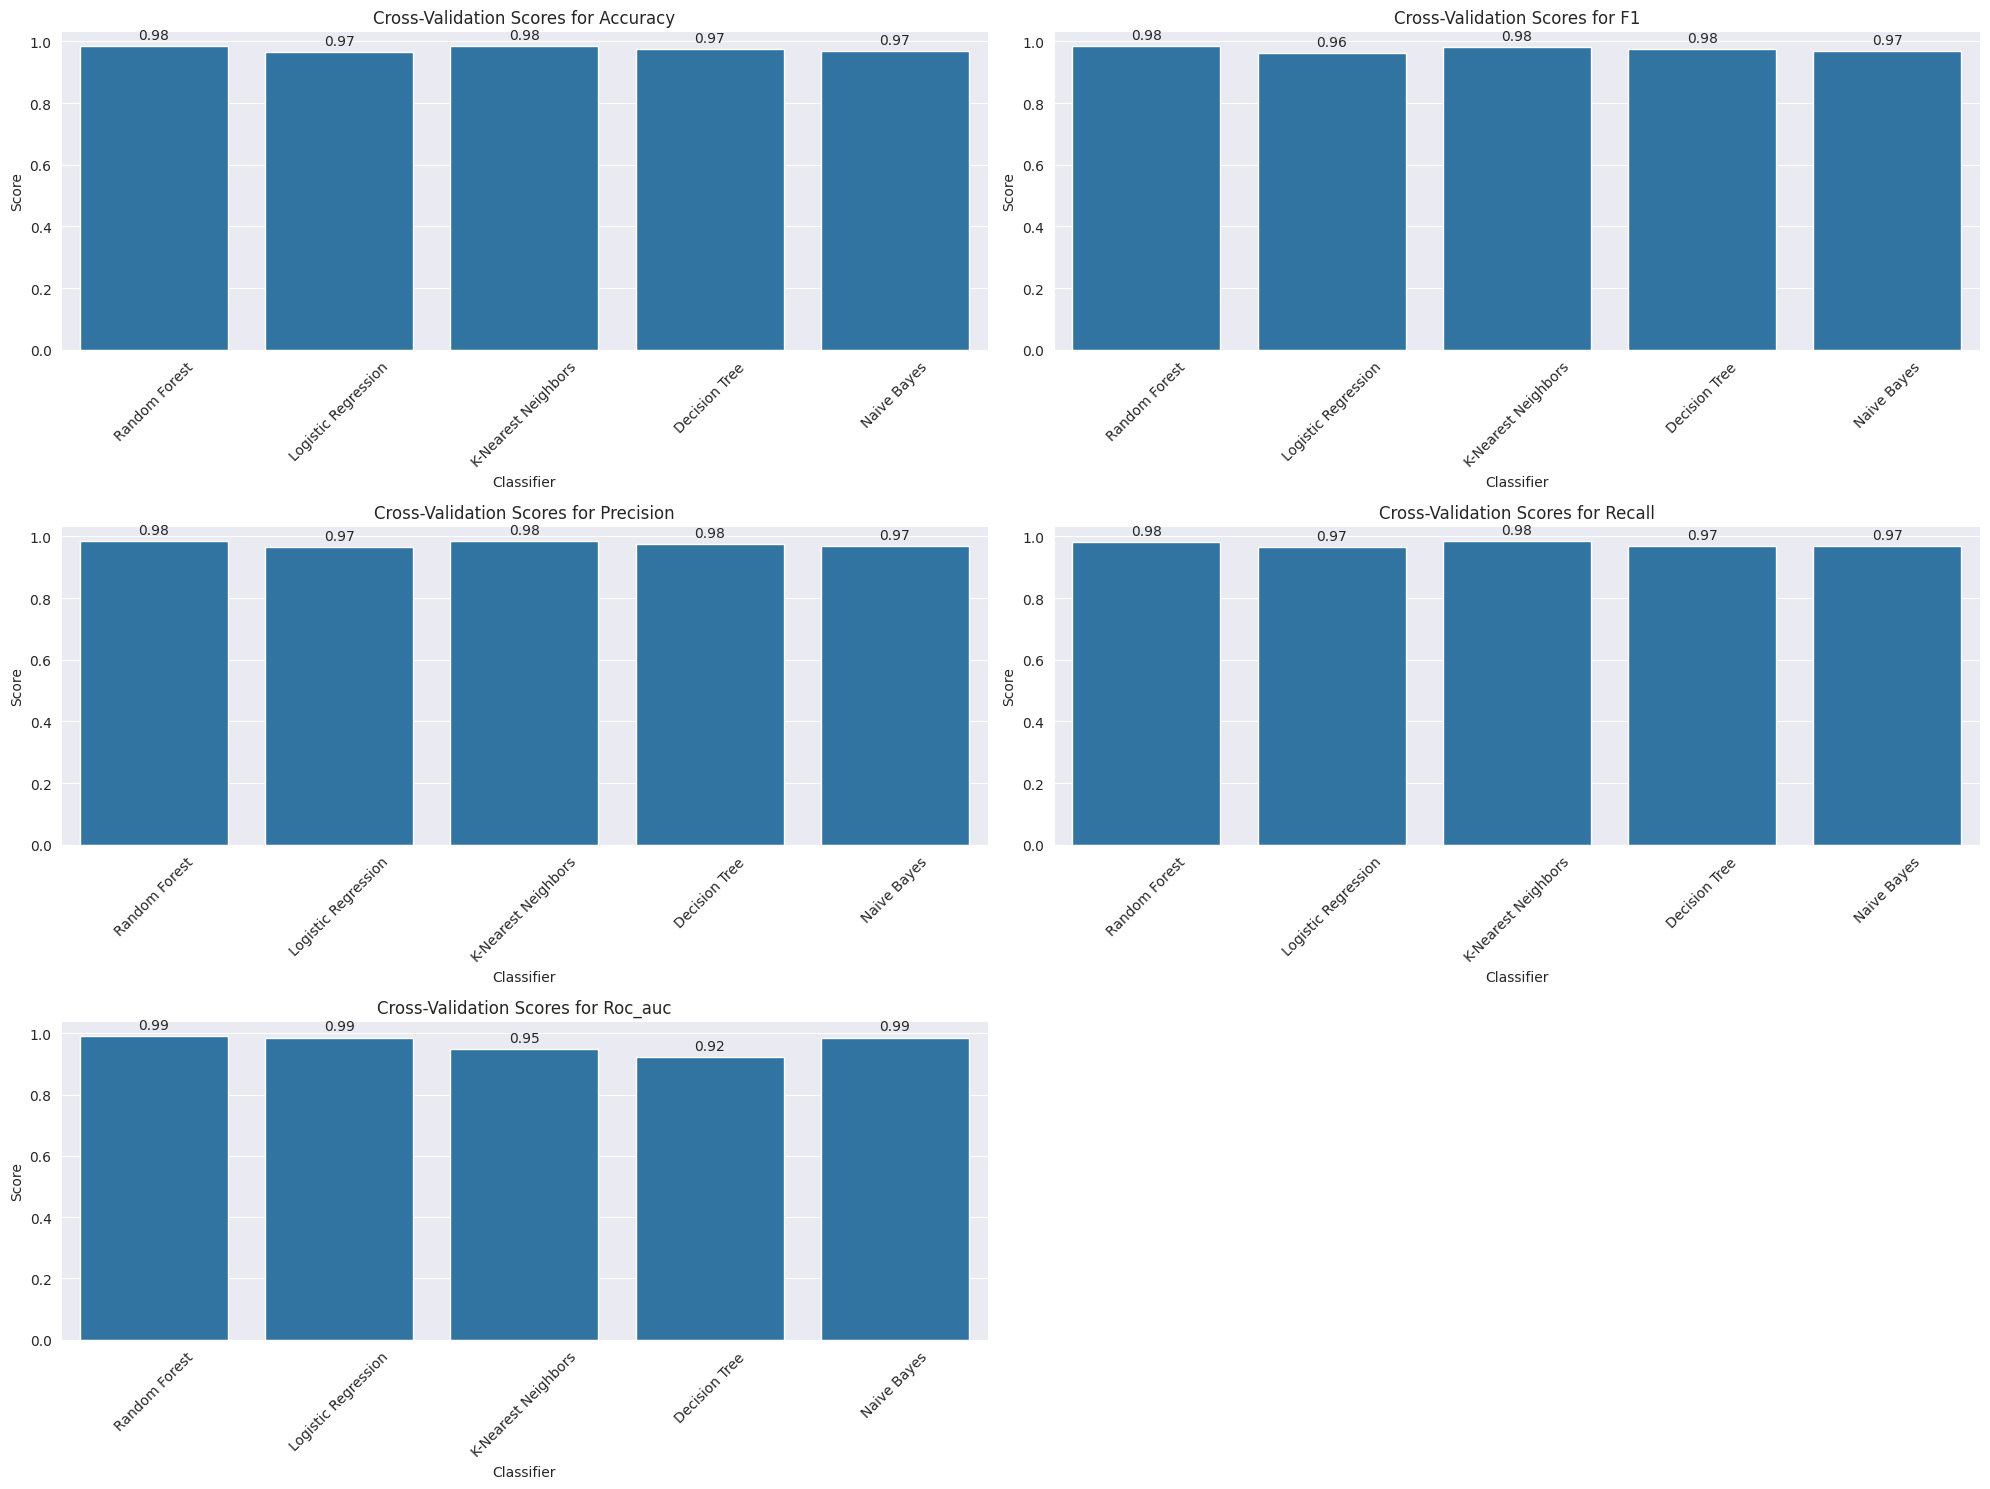

In [132]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(scoring.keys())

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df[df["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Cross-Validation Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])
# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics.pdf')
plt.show()


# With Moderna as y_test

In [133]:
#created in create_embeddings
X_test = pd.read_csv('data/X_test_Moderna.csv')
y_test = pd.read_csv('data/y_test_Moderna.csv')
X_train = pd.read_csv('data/X_train_Moderna.csv')
y_train = pd.read_csv('data/y_train_Moderna.csv')

In [134]:
# Count the occurrences of each value
value_counts = y_test.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_train)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_train that are 1: {num_ones}")
print(f"Percentage of entries in y_train that are 1: {percent_ones:.2f}%")

Number of entries in y_train that are 1: 33
Percentage of entries in y_train that are 1: 4.37%


In [135]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [136]:
# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store cross-validation scores, test scores, and feature importances
results = {}


# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')
    
    # Perform 10-fold cross-validation on the training set
    cv_results = {metric: cross_val_score(clf, X_train, y_train, cv=10, scoring=scorer) 
                  for metric, scorer in scoring.items()}
    
    # Fit the model on the training set
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)

    
    
    # Evaluate on test set
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
    
    feature_importances = None
    
    # Get feature importances or coefficients
    if hasattr(clf, 'feature_importances_'):
        feature_importances = clf.feature_importances_
    elif hasattr(clf, 'coef_'):
        feature_importances = clf.coef_[0]
    
    # Store results
    results[name] = {
        "Cross-Validation Scores": cv_results,
        "Mean CV Scores": {metric: np.mean(scores) for metric, scores in cv_results.items()},
        "CV Scores Std Dev": {metric: np.std(scores) for metric, scores in cv_results.items()},
        "Test Scores": test_scores,
        "Feature Importances": feature_importances,
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

# Convert the results to a DataFrame for easier plotting
data = []

for name, result in results.items():
    for metric, scores in result["Cross-Validation Scores"].items():
        for score in scores:
            data.append({
                "Classifier": name,
                "Metric": metric,
                "Score": score
            })

df = pd.DataFrame(data)

# Create bar plots for each metric
metrics = scoring.keys()

Random Forest
Logistic Regression
K-Nearest Neighbors
Decision Tree
Naive Bayes


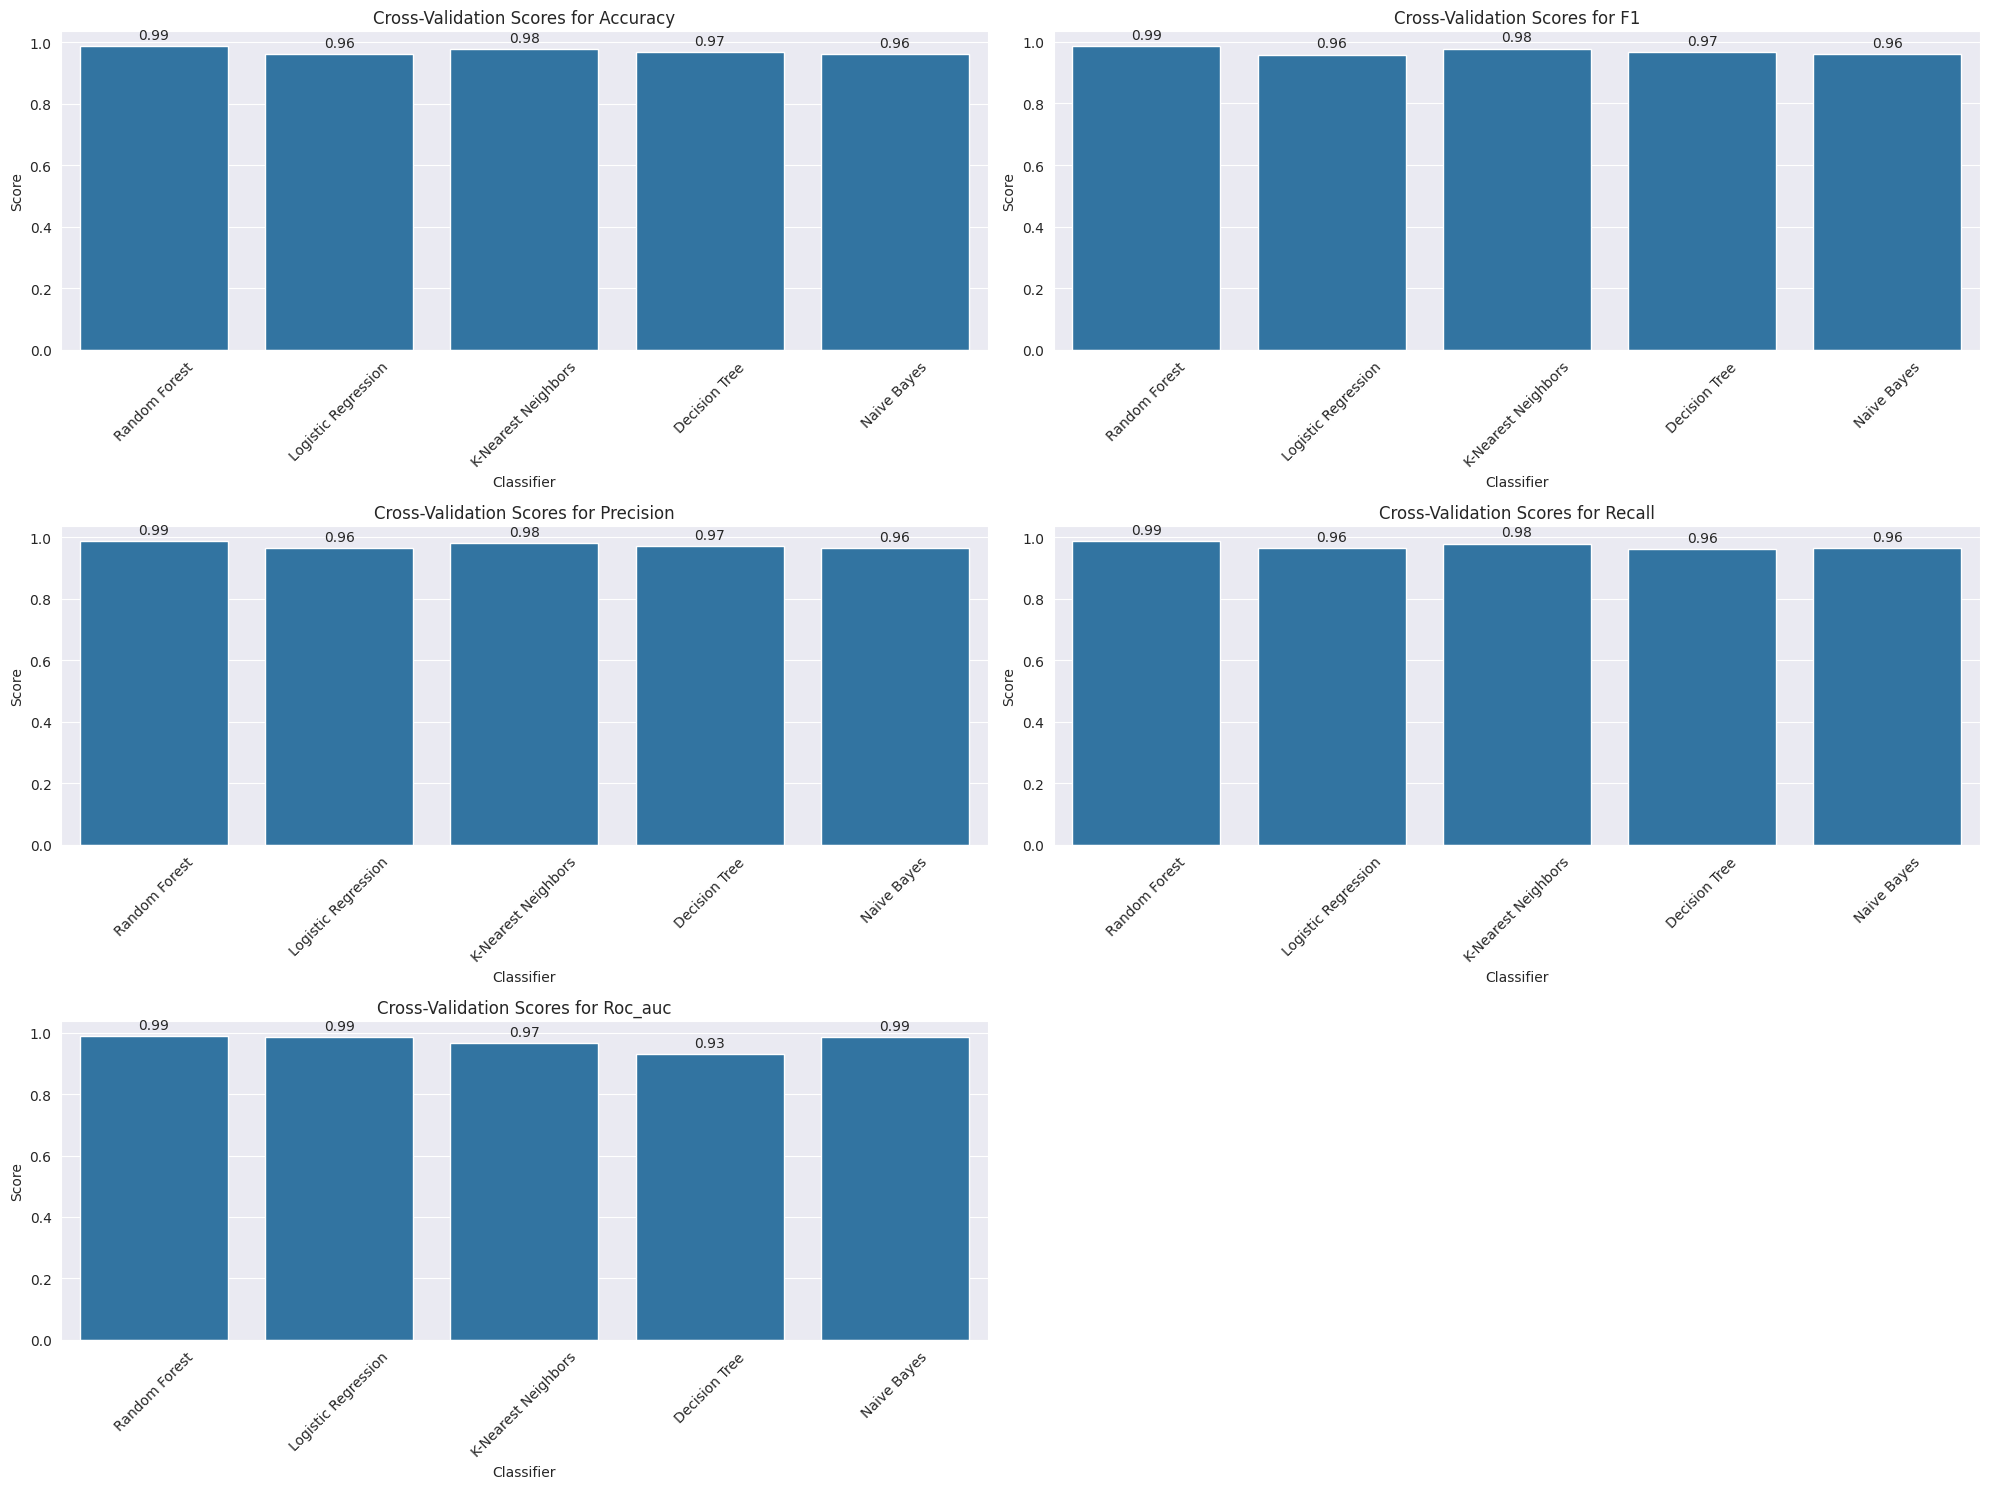

In [137]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(scoring.keys())

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df[df["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Cross-Validation Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xlabel('Classifier')
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])
# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_Moderna_test.pdf')
plt.show()


# With JANSSEN as y_test


In [143]:
#created in create_embeddings
X_test = pd.read_csv('data/X_test_Janssen.csv')
y_test = pd.read_csv('data/y_test_Janssen.csv')
X_train = pd.read_csv('data/X_train_Janssen.csv')
y_train = pd.read_csv('data/y_train_Janssen.csv')

In [146]:
# Count the occurrences of each value
value_counts = y_test.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_test)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_test that are 1: {num_ones}")
print(f"Percentage of entries in y_test that are 1: {percent_ones:.2f}%")

Number of entries in y_test that are 1: 35
Percentage of entries in y_test that are 1: 16.59%


In [140]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [141]:
# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store cross-validation scores, test scores, and feature importances
results = {}


# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')
    
    # Perform 10-fold cross-validation on the training set
    cv_results = {metric: cross_val_score(clf, X_train, y_train, cv=10, scoring=scorer) 
                  for metric, scorer in scoring.items()}
    
    # Fit the model on the training set
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    
    # Evaluate on test set
    test_scores = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
    
    feature_importances = None
    
    # Get feature importances or coefficients
    if hasattr(clf, 'feature_importances_'):
        feature_importances = clf.feature_importances_
    elif hasattr(clf, 'coef_'):
        feature_importances = clf.coef_[0]
    
    # Store results
    results[name] = {
        "Cross-Validation Scores": cv_results,
        "Mean CV Scores": {metric: np.mean(scores) for metric, scores in cv_results.items()},
        "CV Scores Std Dev": {metric: np.std(scores) for metric, scores in cv_results.items()},
        "Test Scores": test_scores,
        "Feature Importances": feature_importances,
        'roc_auc': roc_auc_score(y_test, y_pred)
    }

# Convert the results to a DataFrame for easier plotting
data = []

for name, result in results.items():
    for metric, scores in result["Cross-Validation Scores"].items():
        for score in scores:
            data.append({
                "Classifier": name,
                "Metric": metric,
                "Score": score
            })

df = pd.DataFrame(data)

# Create bar plots for each metric
metrics = scoring.keys()

Random Forest
Logistic Regression
K-Nearest Neighbors
Decision Tree
Naive Bayes


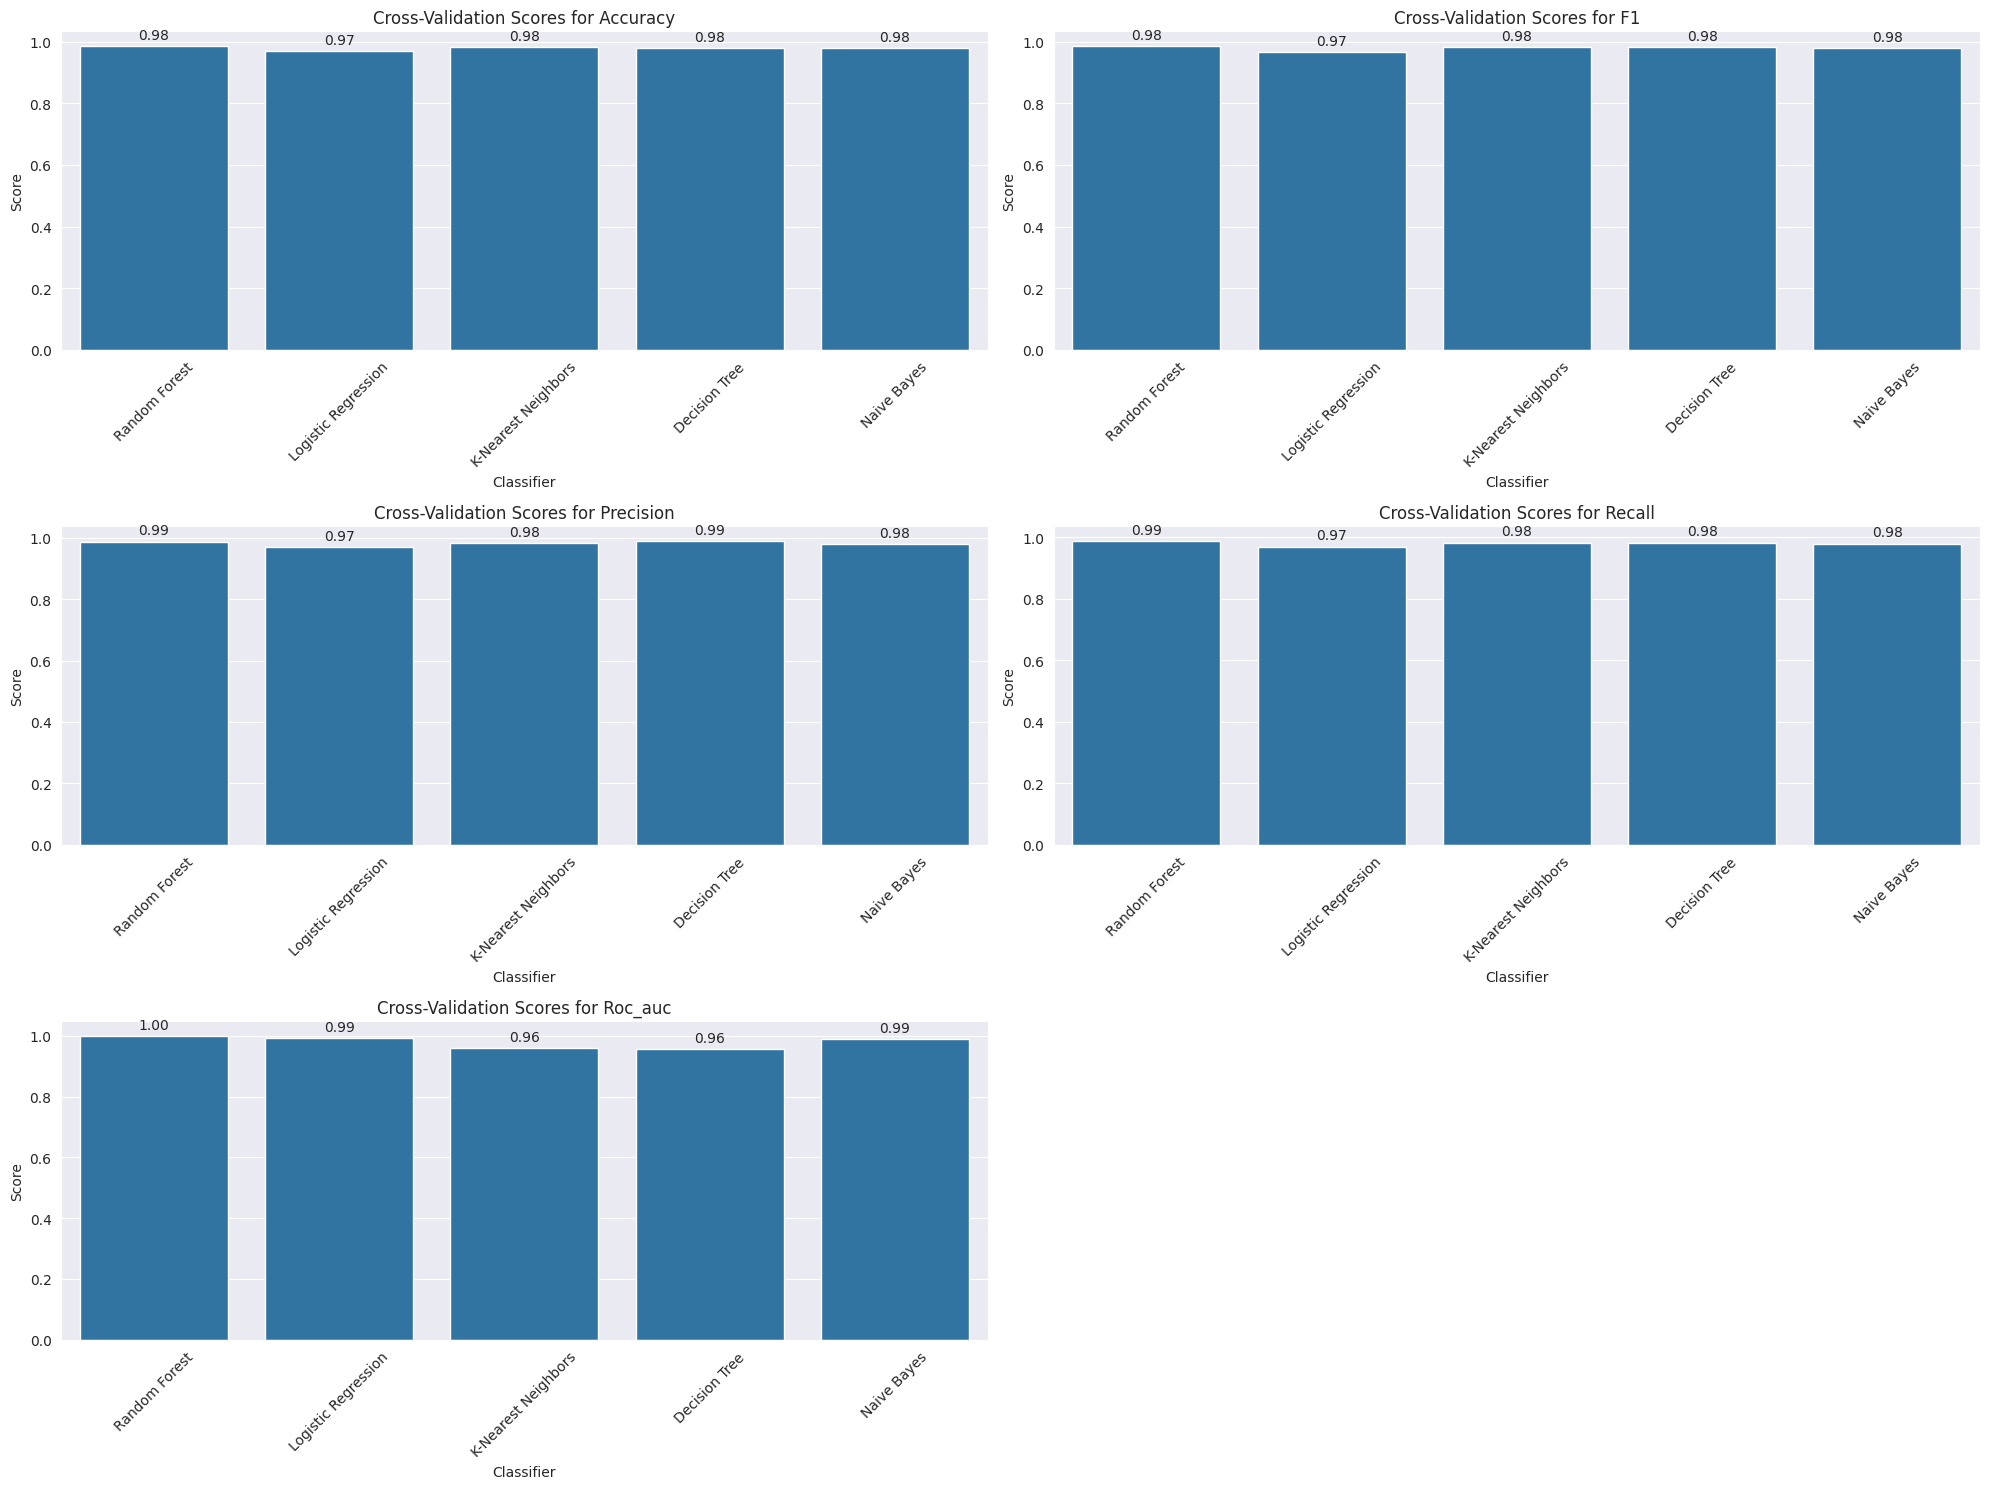

In [142]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(scoring.keys())

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df[df["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Cross-Validation Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_Janssen_test.pdf')
plt.show()


# With unique symptoms in train und test

### with 5% true labels

In [160]:
import pandas as pd
X_test5 = pd.read_csv('data/X_test_unique_5.csv')
y_test5 = pd.read_csv('data/y_test_unique_5.csv')
X_train5 = pd.read_csv('data/X_train_unique_5.csv')
y_train5 = pd.read_csv('data/y_train_unique_5.csv')

In [161]:
# Count the occurrences of each value
value_counts = y_train5.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_train5)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_test that are 1: {num_ones}")
print(f"Percentage of entries in y_test that are 1: {percent_ones:.2f}%")

Number of entries in y_test that are 1: 46
Percentage of entries in y_test that are 1: 5.00%


In [162]:
y_train5 = y_train5.values.ravel()
y_test5 = y_test5.values.ravel()

In [165]:
# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store cross-validation scores, test scores, and feature importances
results = {}


# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')
    
    # Perform 10-fold cross-validation on the training set
    cv_results = {metric: cross_val_score(clf, X_train5, y_train5, cv=10, scoring=scorer) 
                  for metric, scorer in scoring.items()}
    
    # Fit the model on the training set
    clf.fit(X_train5, y_train5)
    with open(f'../Machine_Learning/Models/{name}_model_5.pkl','wb') as f:
        pickle.dump(clf,f)
    
    
    
    # Predict
    y_pred5 = clf.predict(X_test5)
    
    
    # Evaluate on test set
    test_scores = {
        'accuracy': accuracy_score(y_test5, y_pred5),
        'precision': precision_score(y_test5, y_pred5, average='weighted'),
        'recall': recall_score(y_test5, y_pred5, average='weighted'),
        'f1': f1_score(y_test5, y_pred5, average='weighted')
    }
    
    feature_importances = None
    
    # Get feature importances or coefficients
    if hasattr(clf, 'feature_importances_'):
        feature_importances = clf.feature_importances_
    elif hasattr(clf, 'coef_'):
        feature_importances = clf.coef_[0]
    
    # Store results
    results[name] = {
        "Cross-Validation Scores": cv_results,
        "Mean CV Scores": {metric: np.mean(scores) for metric, scores in cv_results.items()},
        "CV Scores Std Dev": {metric: np.std(scores) for metric, scores in cv_results.items()},
        "Test Scores": test_scores,
        "Feature Importances": feature_importances,
        'roc_auc': roc_auc_score(y_test5, y_pred5)
    }

# Convert the results to a DataFrame for easier plotting
data_crossval = []

for name, result in results.items():
    for metric, scores in result["Cross-Validation Scores"].items():
        for score in scores:
            data_crossval.append({
                "Classifier": name,
                "Metric": metric,
                "Score": score
            })

df5 = pd.DataFrame(data_crossval)

data_pred5 = []

for name, result in results.items():
    for metric, score in result["Test Scores"].items():
        data_pred5.append({
            "Classifier": name,
            "Metric": metric,
            "Score": score
        })

df_pred5 = pd.DataFrame(data)

Random Forest
Logistic Regression
K-Nearest Neighbors


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
Naive Bayes


In [166]:
df_pred5

,Classifier,Metric,Score
0,Random Forest,accuracy,0.978261
1,Random Forest,accuracy,0.978261
2,Random Forest,accuracy,1.000000
3,Random Forest,accuracy,0.956522
4,Random Forest,accuracy,1.000000
...,...,...,...
245,Naive Bayes,roc_auc,0.985366
246,Naive Bayes,roc_auc,0.985119
247,Naive Bayes,roc_auc,0.964286
248,Naive Bayes,roc_auc,1.000000


In [167]:
df5

,Classifier,Metric,Score
0,Random Forest,accuracy,0.978261
1,Random Forest,accuracy,0.989130
2,Random Forest,accuracy,1.000000
3,Random Forest,accuracy,0.989130
4,Random Forest,accuracy,1.000000
...,...,...,...
245,Naive Bayes,roc_auc,0.981609
246,Naive Bayes,roc_auc,1.000000
247,Naive Bayes,roc_auc,0.982955
248,Naive Bayes,roc_auc,0.988636


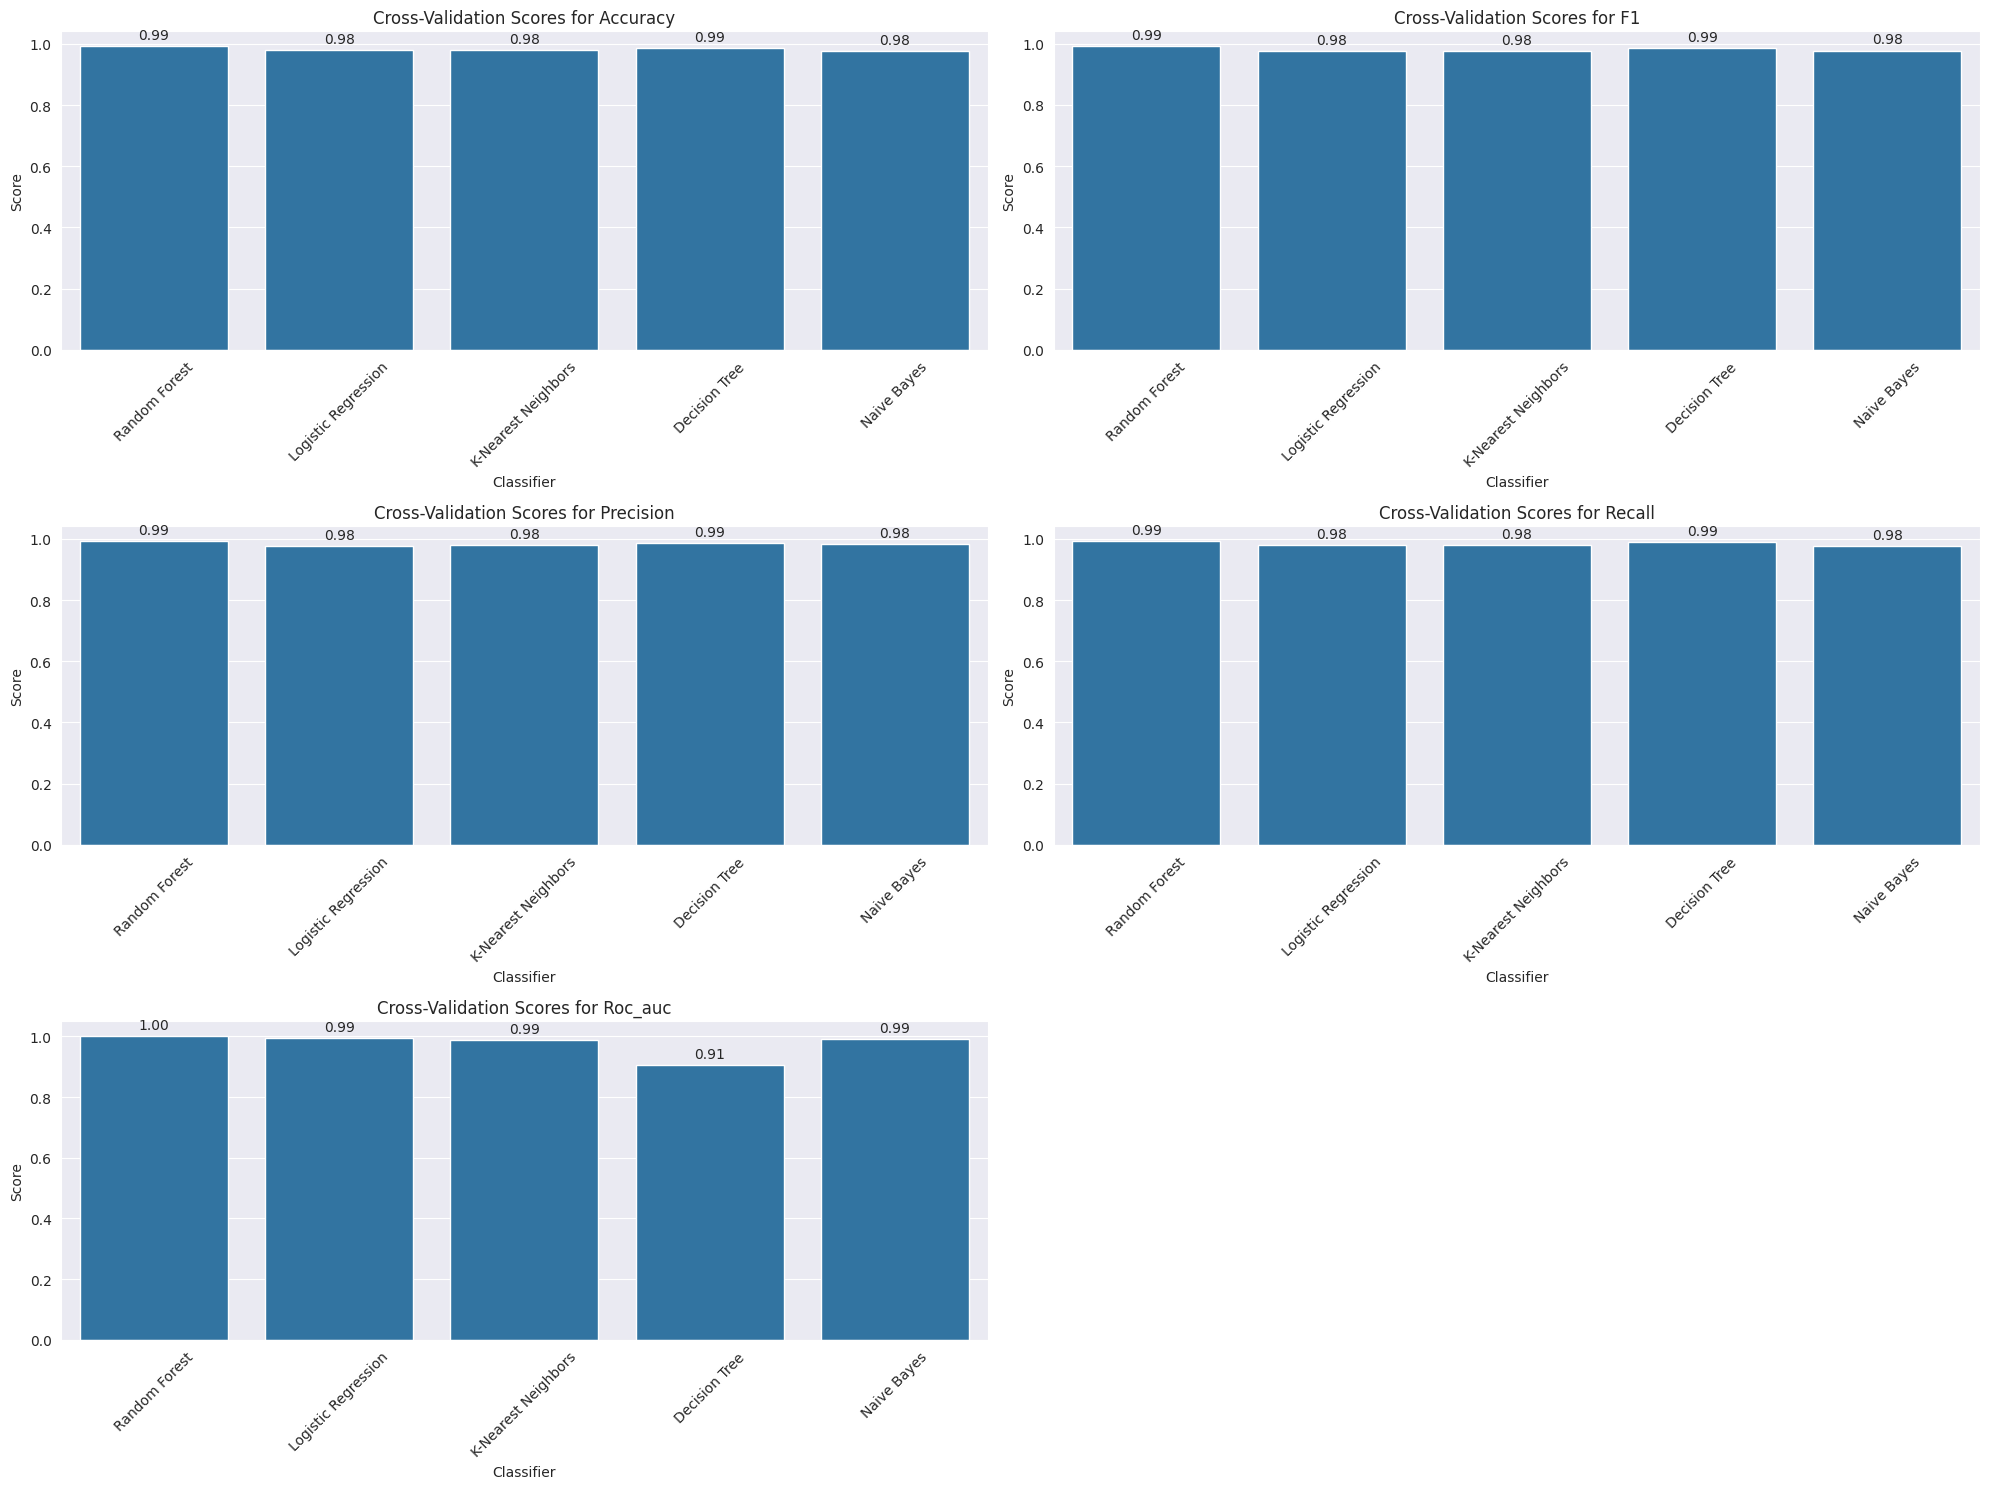

In [168]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(scoring.keys())

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df5[df5["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Cross-Validation Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_unique_5.pdf')
plt.show()


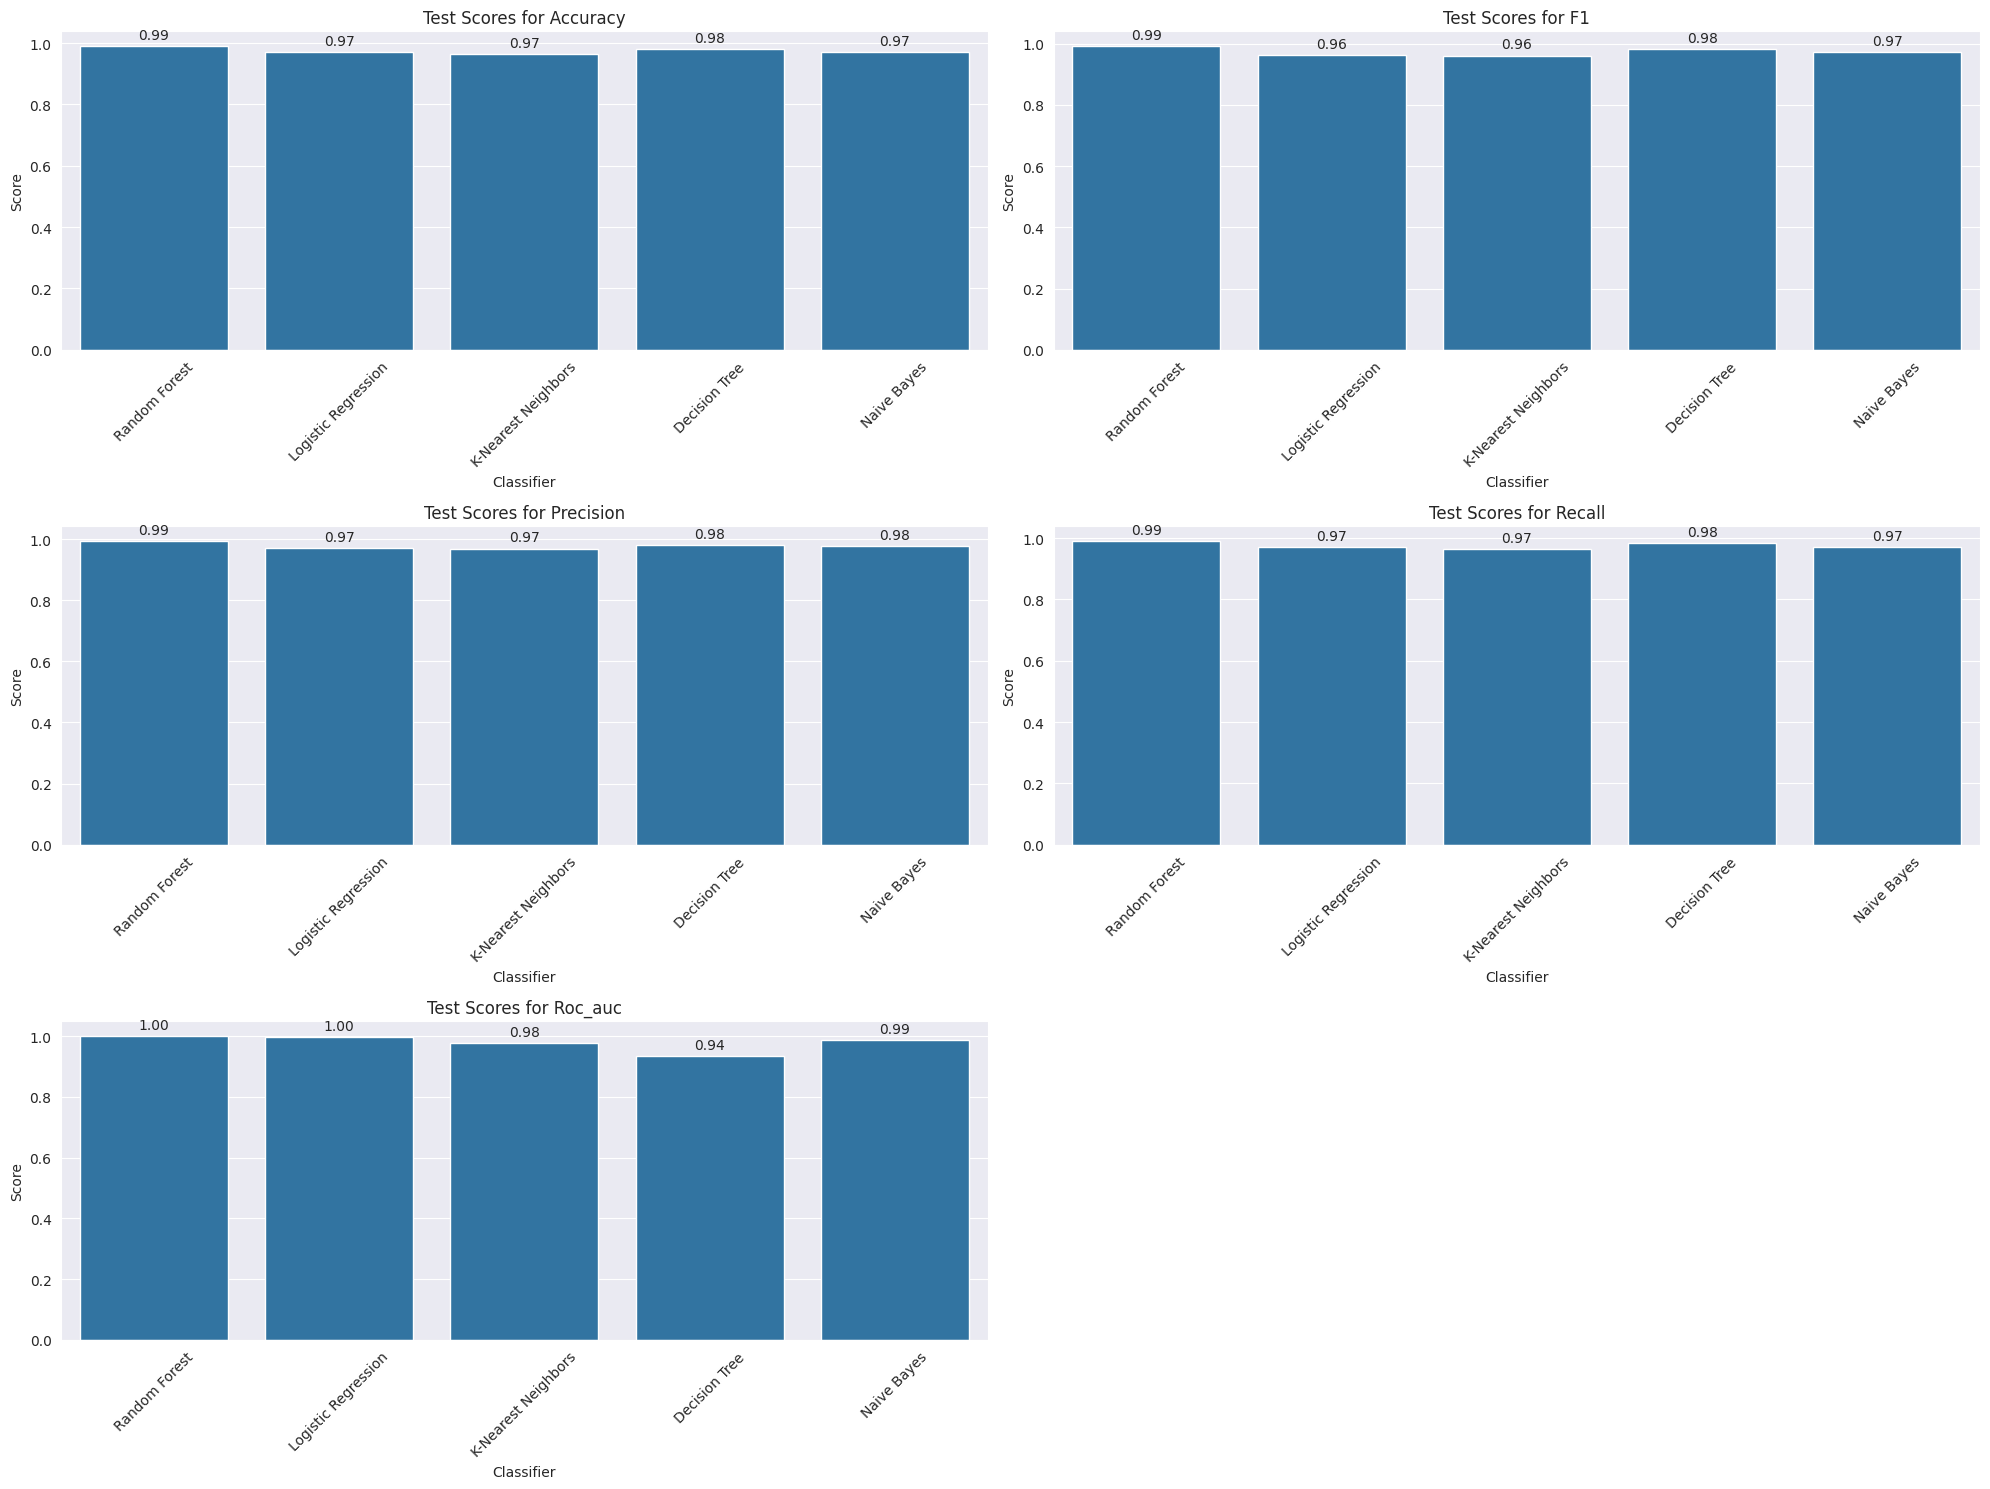

In [169]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(scoring.keys())

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df_pred5[df_pred5["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Test Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_unique_5_pred.pdf')
plt.show()


### with 10 percent true labels

In [170]:
import pandas as pd
X_test10 = pd.read_csv('data/X_test_unique_10.csv')
y_test10 = pd.read_csv('data/y_test_unique_10.csv')
X_train10 = pd.read_csv('data/X_train_unique_10.csv')
y_train10 = pd.read_csv('data/y_train_unique_10.csv')

In [179]:
X_train

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,...,symptom_embedding_40,symptom_embedding_41,symptom_embedding_42,symptom_embedding_43,symptom_embedding_44,symptom_embedding_45,symptom_embedding_46,symptom_embedding_47,symptom_embedding_48,symptom_embedding_49
0,0.027611,0.036081,0.051553,0.057510,0.057431,0.059029,0.032577,0.022302,0.023684,0.012048,...,0.012066,0.013675,-0.024218,-0.031613,0.017947,-0.066405,-0.017334,-0.038768,0.063130,0.007089
1,0.024010,0.004558,0.009926,0.005297,0.007645,0.006170,0.005799,0.006372,0.010526,0.006885,...,0.035543,0.006451,-0.030866,-0.031337,0.042467,0.014026,0.002977,-0.030337,0.018087,-0.013264
2,0.039616,0.077858,0.234390,0.254446,0.250792,0.257713,0.172608,0.123407,0.094737,0.041308,...,-0.036574,-0.021541,0.015819,0.001767,-0.028603,0.028815,-0.036104,-0.044265,-0.023584,0.028485
3,1.000000,1.000000,1.000000,0.703746,0.627634,0.702797,0.464097,0.358751,0.427368,0.442341,...,-0.012059,0.017573,-0.013478,-0.043629,0.033726,-0.034961,-0.020161,-0.053753,0.031103,0.006870
4,0.199280,0.472465,0.902337,0.772796,0.771210,0.876594,0.610268,0.525276,0.567895,0.425129,...,-0.004227,-0.025619,0.016084,-0.025418,0.012979,-0.009797,-0.016336,-0.040287,0.017507,0.025215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.000000,0.000000,0.000640,0.000000,0.000186,0.000000,0.000341,0.000000,0.000526,0.000000,...,0.023910,-0.036575,-0.041888,-0.049494,0.014146,0.048273,0.021185,0.042142,-0.030881,0.020971
456,0.001200,0.000380,0.001281,0.000757,0.001865,0.001851,0.001023,0.000850,0.001579,0.003442,...,-0.009887,-0.031851,0.048016,0.061555,-0.038288,0.050695,-0.060685,-0.043969,-0.043011,-0.014097
457,0.000000,0.000000,0.000000,0.000378,0.000559,0.001645,0.000512,0.000425,0.000000,0.000000,...,0.035195,-0.047795,-0.019548,0.037727,0.044366,-0.048672,0.005199,0.033184,0.040973,0.044076
458,0.000000,0.001139,0.002882,0.001324,0.001119,0.001645,0.000512,0.000000,0.000000,0.000000,...,-0.022521,0.041985,0.053197,-0.018382,0.007848,-0.015901,0.033466,0.079494,-0.078385,-0.050166


In [171]:
# Count the occurrences of each value
value_counts = y_train10.value_counts()

# Get the count of 1's
num_ones = value_counts.get(1, 0)

total_entries = len(y_train10)

percent_ones = (num_ones / total_entries) * 100

print(f"Number of entries in y_test that are 1: {num_ones}")
print(f"Percentage of entries in y_test that are 1: {percent_ones:.2f}%")

Number of entries in y_test that are 1: 46
Percentage of entries in y_test that are 1: 10.00%


In [172]:
y_train10 = y_train10.values.ravel()
y_test10 = y_test10.values.ravel()

In [174]:
# List of classifiers to evaluate
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store cross-validation scores, test scores, and feature importances
results = {}


# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Loop through the classifiers
for name, clf in classifiers.items():
    print(f'{name}')
    
    # Perform 10-fold cross-validation on the training set
    cv_results = {metric: cross_val_score(clf, X_train10, y_train10, cv=10, scoring=scorer) 
                  for metric, scorer in scoring.items()}
    
    # Fit the model on the training set
    clf.fit(X_train10, y_train10)
    with open(f'../Machine_Learning/Models/{name}_model_10.pkl','wb') as f:
        pickle.dump(clf,f)
    
    # Predict
    y_pred10 = clf.predict(X_test10)
    
    
    # Evaluate on test set
    test_scores = {
        'accuracy': accuracy_score(y_test10, y_pred10),
        'precision': precision_score(y_test10, y_pred10, average='weighted'),
        'recall': recall_score(y_test10, y_pred10, average='weighted'),
        'f1': f1_score(y_test10, y_pred10, average='weighted')
    }
    
    feature_importances = None
    
    # Get feature importances or coefficients
    if hasattr(clf, 'feature_importances_'):
        feature_importances = clf.feature_importances_
    elif hasattr(clf, 'coef_'):
        feature_importances = clf.coef_[0]
    
    # Store results
    results[name] = {
        "Cross-Validation Scores": cv_results,
        "Mean CV Scores": {metric: np.mean(scores) for metric, scores in cv_results.items()},
        "CV Scores Std Dev": {metric: np.std(scores) for metric, scores in cv_results.items()},
        "Test Scores": test_scores,
        "Feature Importances": feature_importances,
        'roc_auc': roc_auc_score(y_test10, y_pred10)
    }

# Convert the results to a DataFrame for easier plotting
data = []

for name, result in results.items():
    for metric, scores in result["Cross-Validation Scores"].items():
        for score in scores:
            data.append({
                "Classifier": name,
                "Metric": metric,
                "Score": score
            })

df10 = pd.DataFrame(data)

data_pred10 = []

for name, result in results.items():
    for metric, score in result["Test Scores"].items():
        data_pred10.append({
            "Classifier": name,
            "Metric": metric,
            "Score": score
        })

df_pred10 = pd.DataFrame(data)

Random Forest
Logistic Regression
K-Nearest Neighbors


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree


/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes


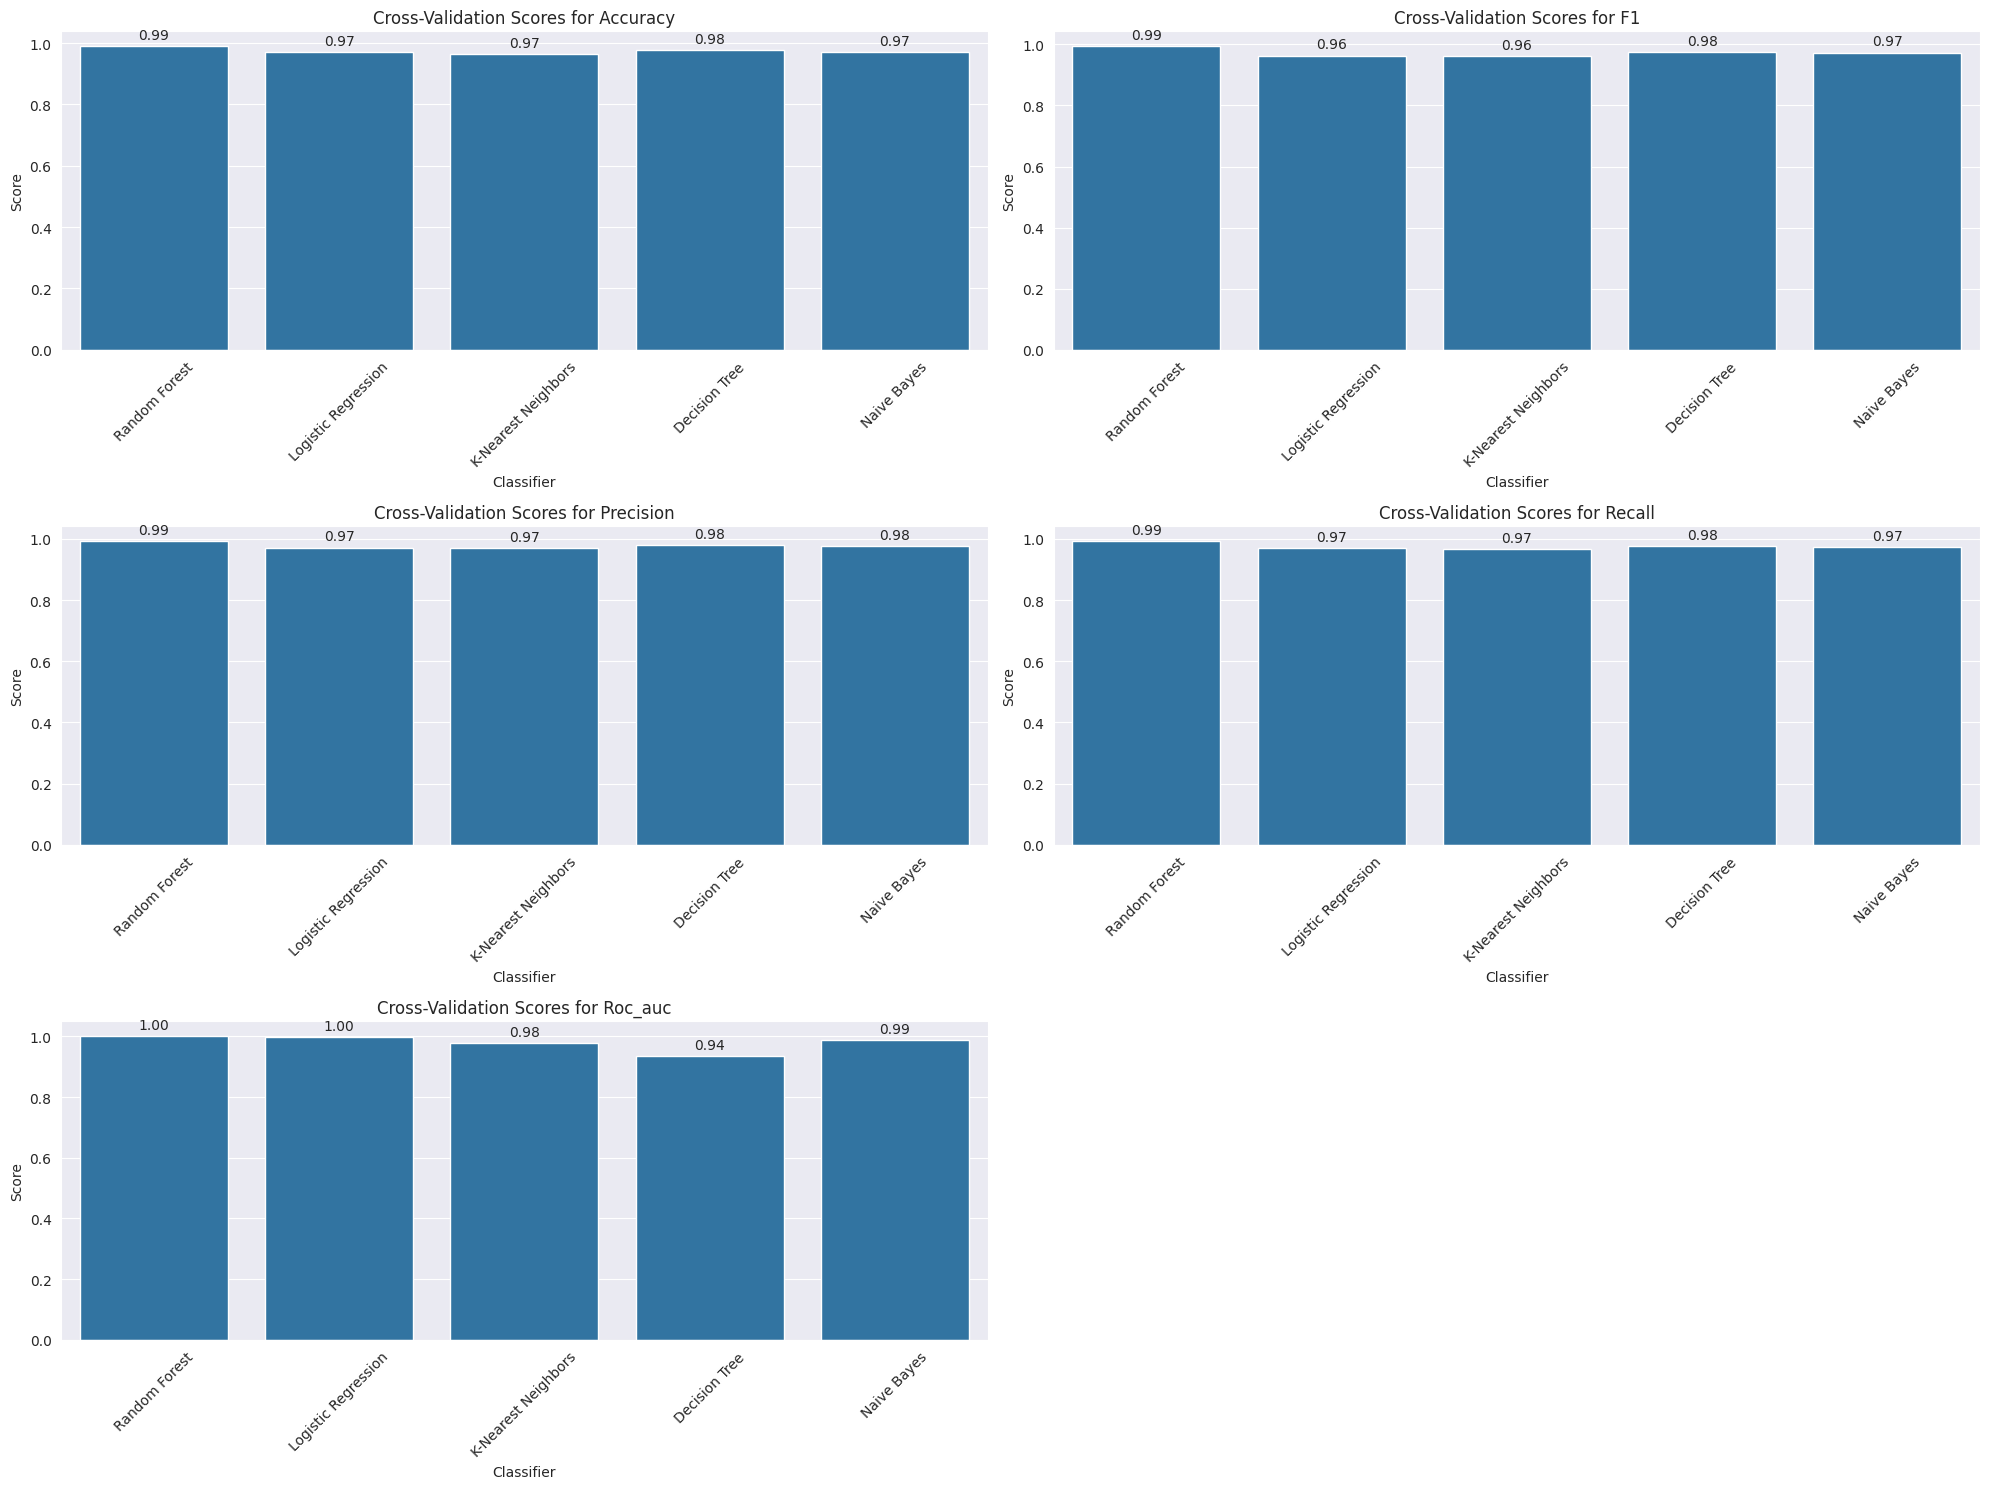

In [175]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(scoring.keys())

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df10[df10["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Cross-Validation Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_unique_5.pdf')
plt.show()


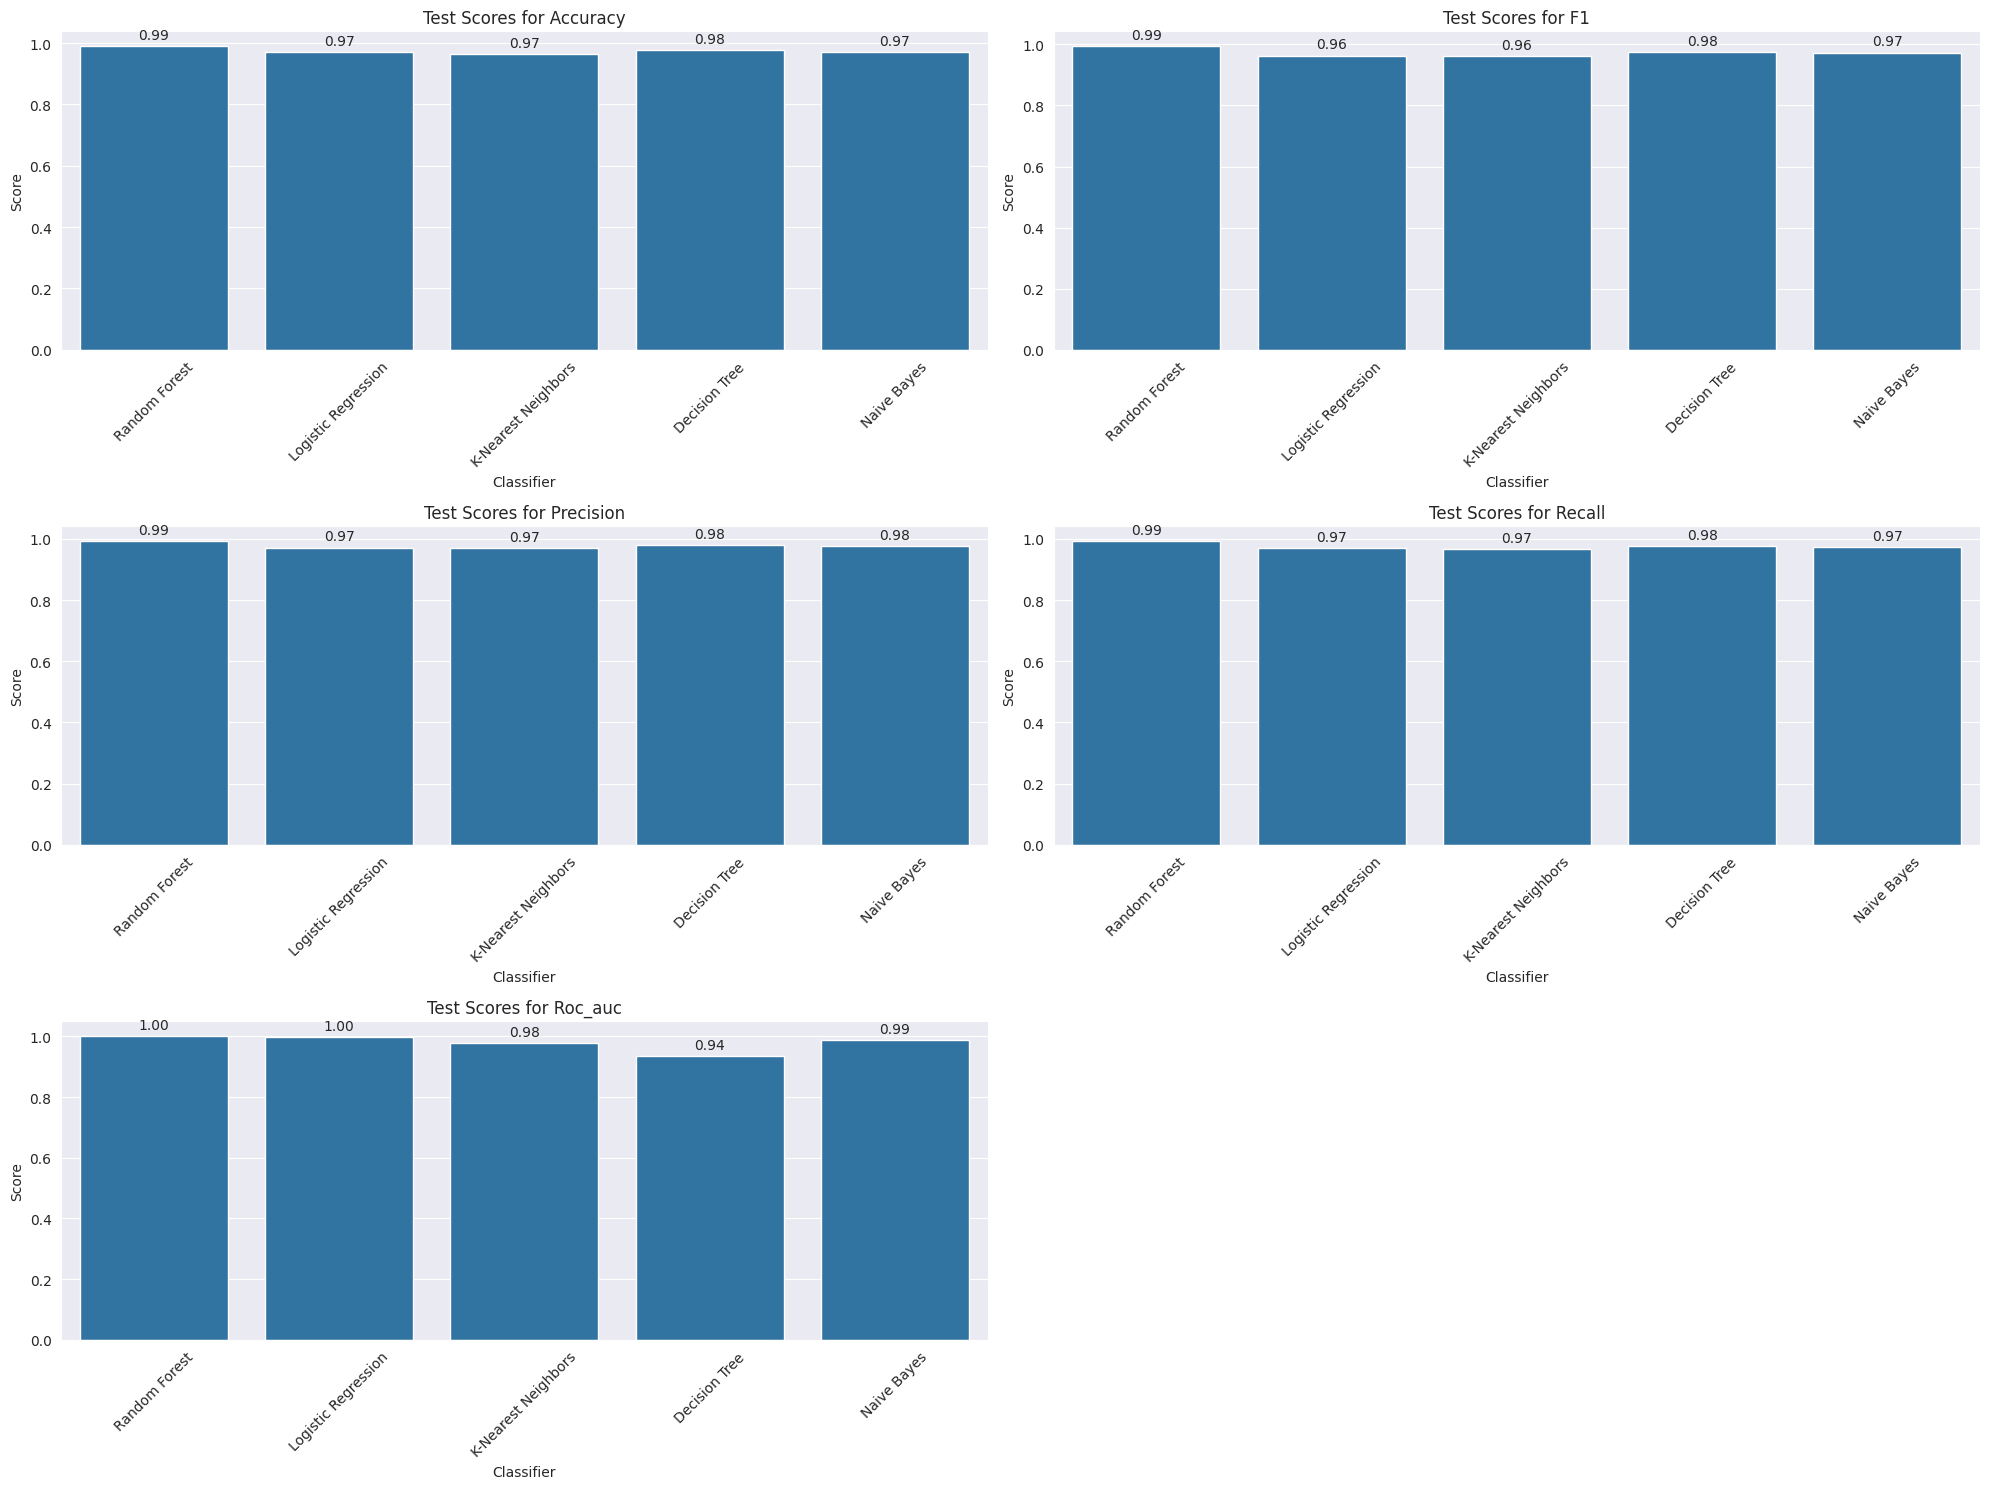

In [176]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(scoring.keys())

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df_pred10[df_pred10["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Test Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_unique_10_pred.pdf')
plt.show()


### Plot both splits together

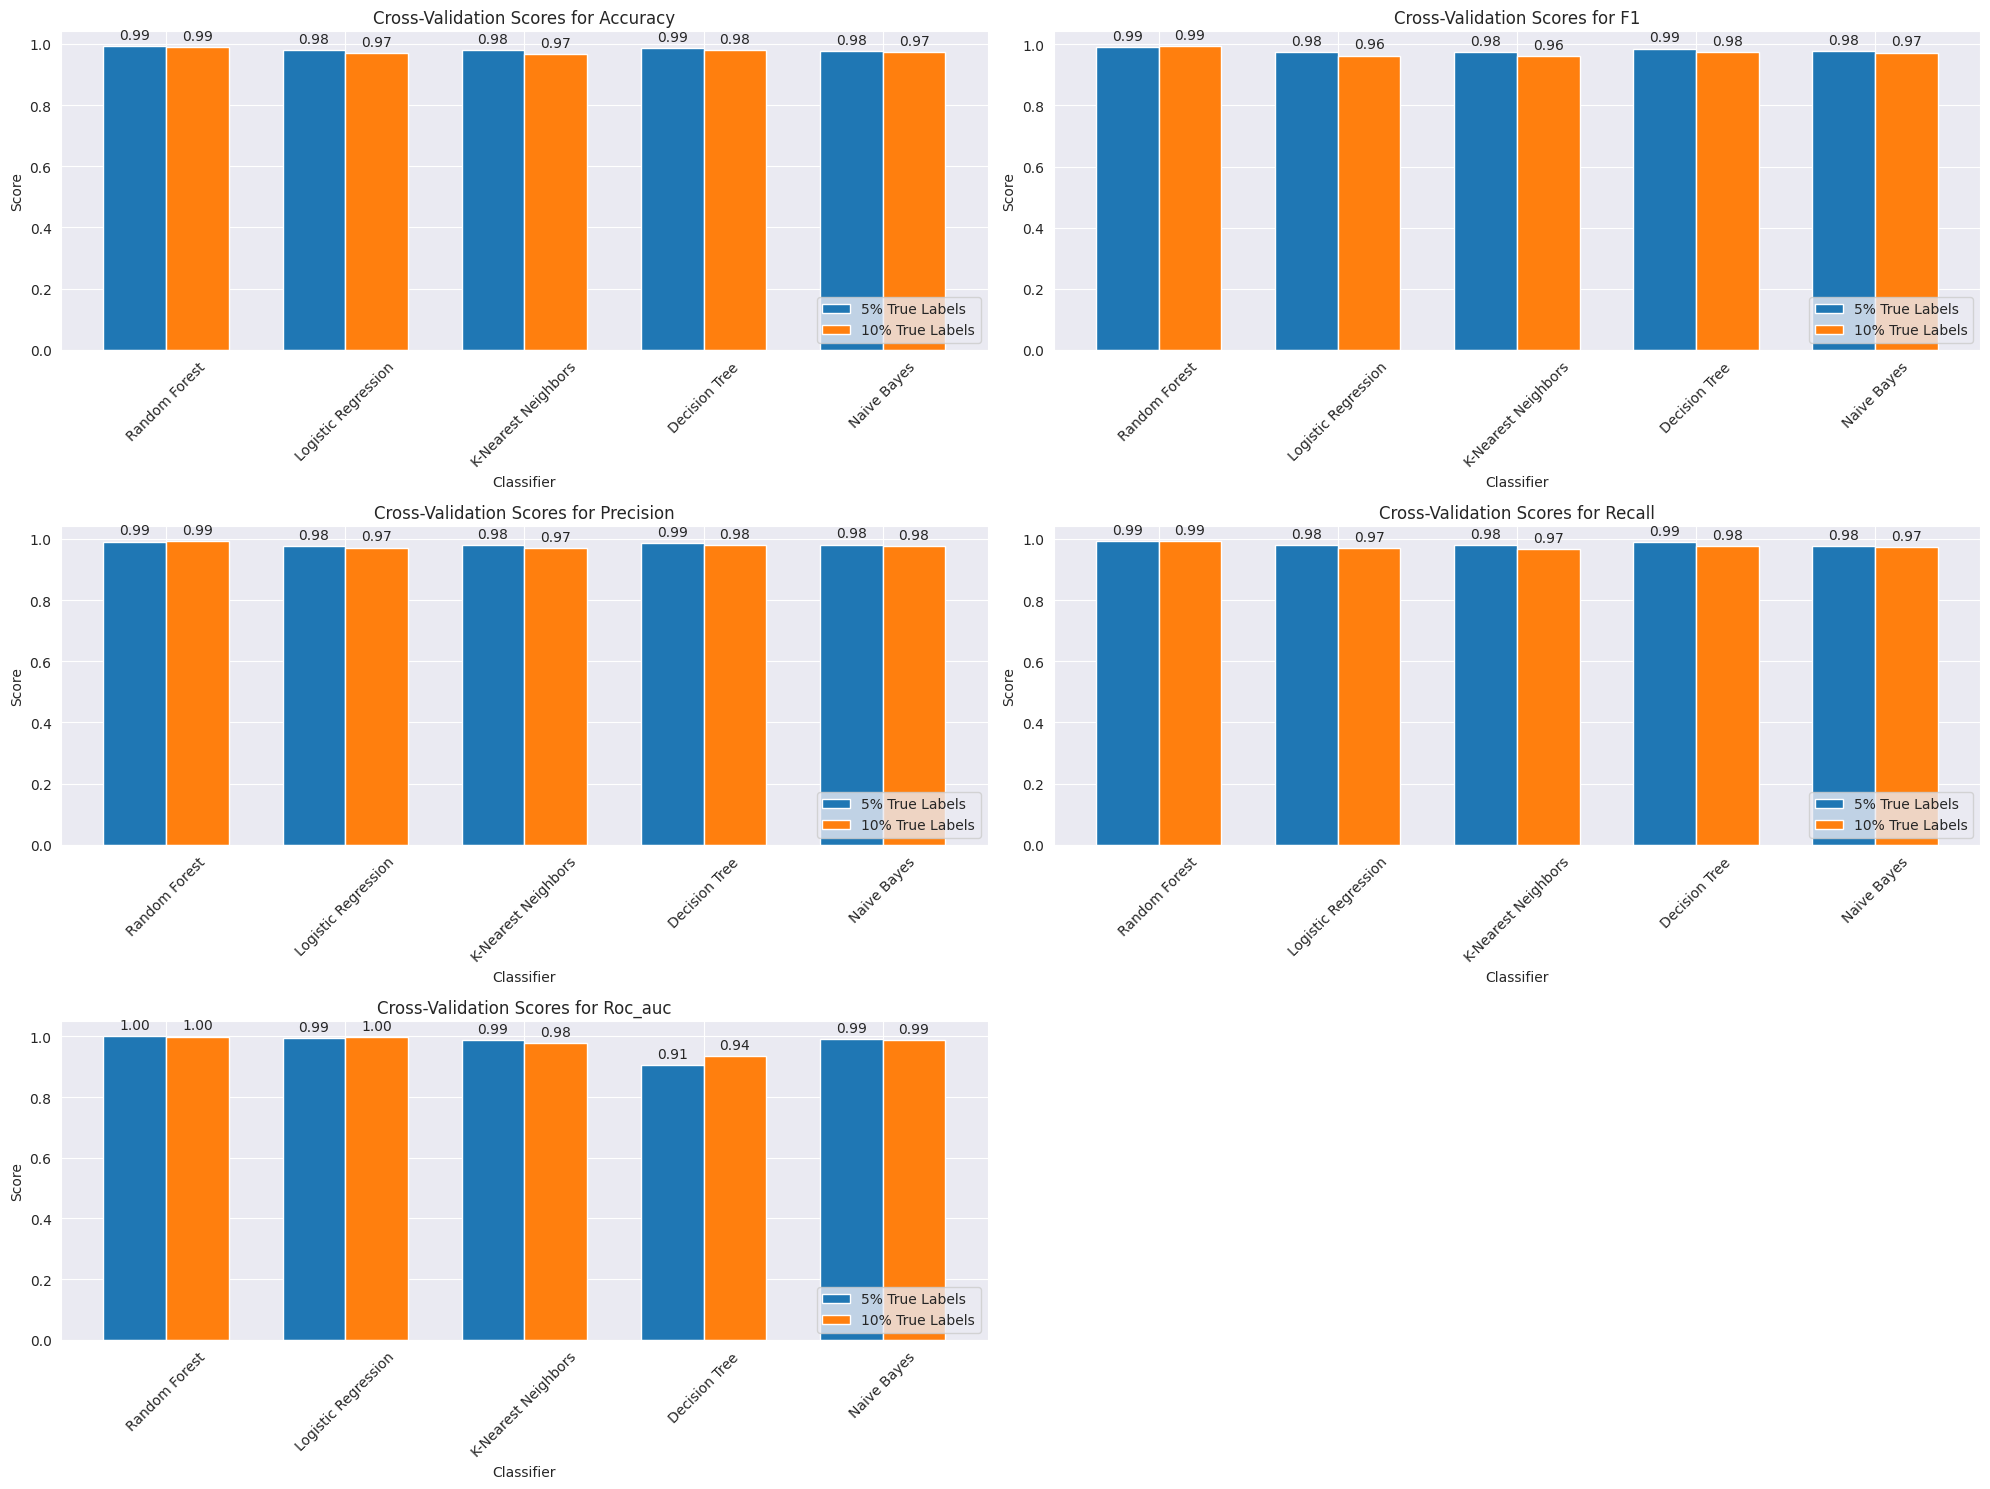

In [177]:
df5["MetricType"] = "Metrics5"
df10["MetricType"] = "Metrics10"

# Combine the two DataFrames
combined_df = pd.concat([df5, df10])

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(combined_df["Metric"].unique())

# Create a 3x2 subplot
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Define bar width and positions
bar_width = 0.35
bar_positions = np.arange(len(df5["Classifier"].unique()))

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = combined_df[combined_df["Metric"] == metric]
    
    # Separate data for Metrics5 and Metrics10
    data5 = metric_data[metric_data["MetricType"] == "Metrics5"]
    data10 = metric_data[metric_data["MetricType"] == "Metrics10"]
    
    classifiers = data5["Classifier"].unique()
    
    # Get mean scores
    means5 = data5.groupby("Classifier")["Score"].mean().reindex(classifiers)
    means10 = data10.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    
    # Plot bars
    bars1 = ax.bar(bar_positions - bar_width/2, means5, bar_width, label='5% True Labels')
    bars2 = ax.bar(bar_positions + bar_width/2, means10, bar_width, label='10% True Labels')
    
    ax.set_title(f'Cross-Validation Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2., height),
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

    # Add legend
    ax.legend(loc='lower right')

# Hide the last (6th) subplot if there are less than 6 metrics
if len(metrics) < 6:
    fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_crossval_combined.pdf')
plt.show()

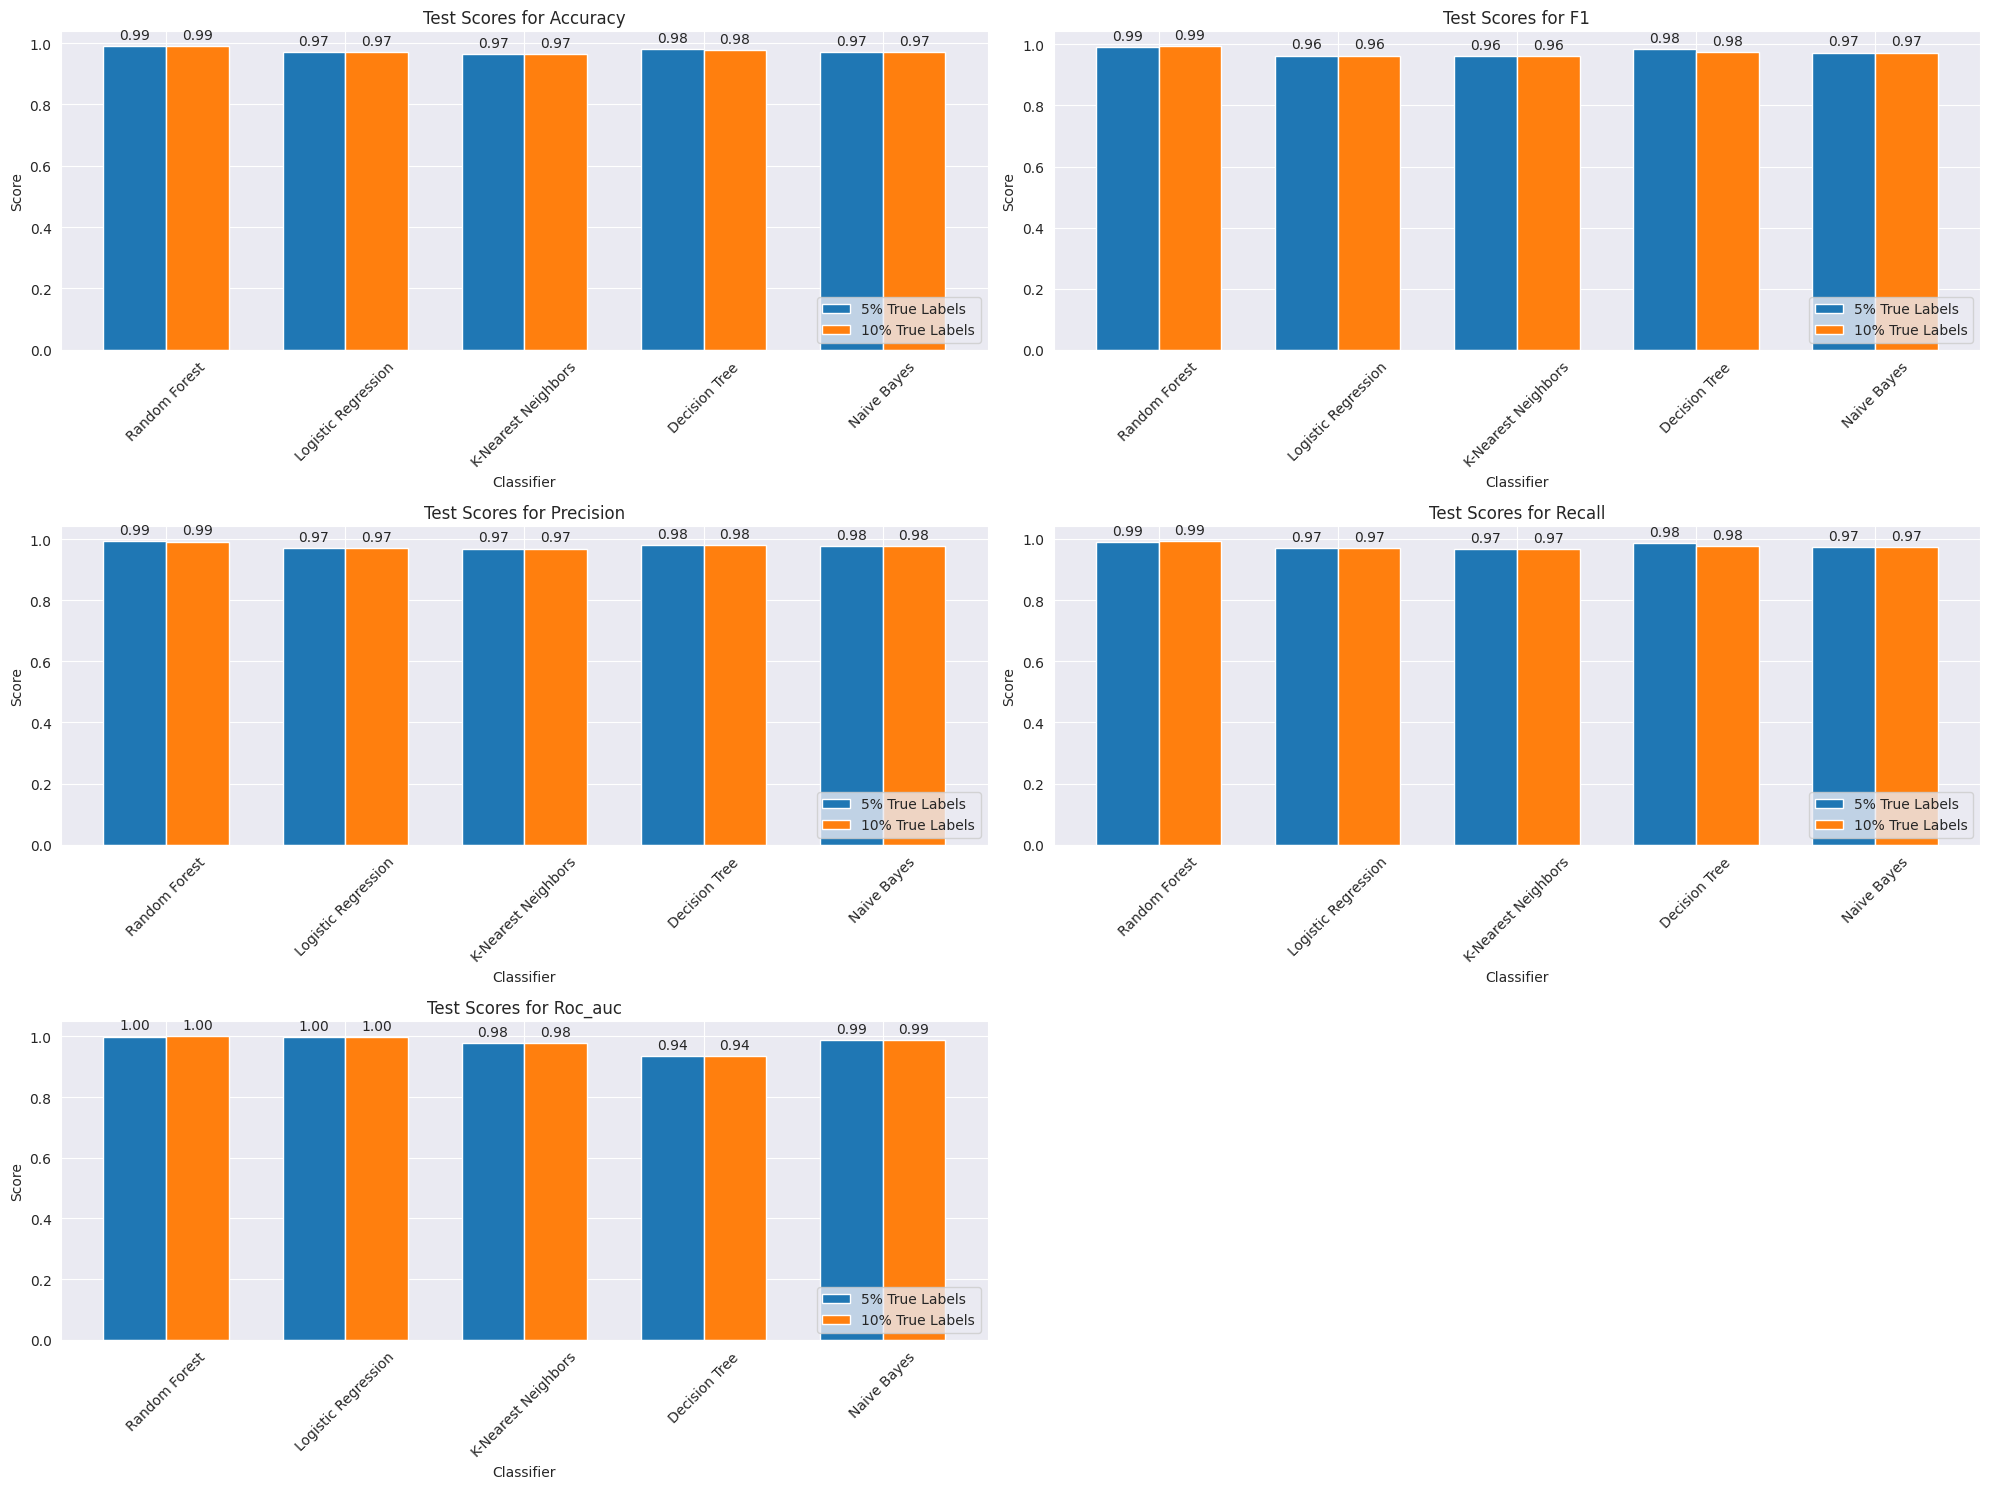

In [178]:
df_pred5["MetricType"] = "Metrics5"
df_pred10["MetricType"] = "Metrics10"

# Combine the two DataFrames
combined_df = pd.concat([df_pred5, df_pred10])

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(combined_df["Metric"].unique())

# Create a 3x2 subplot
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Define bar width and positions
bar_width = 0.35
bar_positions = np.arange(len(df_pred5["Classifier"].unique()))

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = combined_df[combined_df["Metric"] == metric]
    
    # Separate data for Metrics5 and Metrics10
    data5 = metric_data[metric_data["MetricType"] == "Metrics5"]
    data10 = metric_data[metric_data["MetricType"] == "Metrics10"]
    
    classifiers = data5["Classifier"].unique()
    
    # Get mean scores
    means5 = data5.groupby("Classifier")["Score"].mean().reindex(classifiers)
    means10 = data10.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    
    # Plot bars
    bars1 = ax.bar(bar_positions - bar_width/2, means5, bar_width, label='5% True Labels')
    bars2 = ax.bar(bar_positions + bar_width/2, means10, bar_width, label='10% True Labels')
    
    ax.set_title(f'Test Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2., height),
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

    # Add legend
    ax.legend(loc='lower right')

# Hide the last (6th) subplot if there are less than 6 metrics
if len(metrics) < 6:
    fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_pred_combined.pdf')
plt.show()

## Dummy Classifier

### most frequent

In [142]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train5, y_train5)
most_frequent_dummy_pred_5 = dummy_clf.predict(X_test5)

accuracy_mf_5 = accuracy_score(y_test5, most_frequent_dummy_pred_5)
precision_mf_5 = precision_score(y_test5, most_frequent_dummy_pred_5, average='weighted')
recall_mf_5 = recall_score(y_test5, most_frequent_dummy_pred_5, average='weighted')
f1_mf_5 = f1_score(y_test5, most_frequent_dummy_pred_5, average='weighted')
roc_auc_mf_5 = roc_auc_score(y_test5, most_frequent_dummy_pred_5, multi_class='ovr')


dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train10, y_train10)
most_frequent_dummy_pred_10 = dummy_clf.predict(X_test10)

accuracy_mf_10 = accuracy_score(y_test10, most_frequent_dummy_pred_10)
precision_mf_10 = precision_score(y_test10, most_frequent_dummy_pred_10, average='weighted')
recall_mf_10 = recall_score(y_test10, most_frequent_dummy_pred_10, average='weighted')
f1_mf_10 = f1_score(y_test10, most_frequent_dummy_pred_10, average='weighted')
roc_auc_mf_10 = roc_auc_score(y_test10, most_frequent_dummy_pred_10, multi_class='ovr')




/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### constant

In [143]:
dummy_clf = DummyClassifier(strategy='constant', constant=1)
dummy_clf.fit(X_train5, y_train5)
constant_dummy_pred_5 = dummy_clf.predict(X_test5)

accuracy_constant_5 = accuracy_score(y_test5, constant_dummy_pred_5)
precision_constant_5 = precision_score(y_test5, constant_dummy_pred_5, average='weighted')
recall_constant_5 = recall_score(y_test5, constant_dummy_pred_5, average='weighted')
f1_constant_5 = f1_score(y_test5, constant_dummy_pred_5, average='weighted')
roc_auc_constant_5 = roc_auc_score(y_test5, constant_dummy_pred_5, multi_class='ovr')

dummy_clf = DummyClassifier(strategy='constant', constant=1)
dummy_clf.fit(X_train10, y_train10)
constant_dummy_pred_10 = dummy_clf.predict(X_test10)

accuracy_constant_10 = accuracy_score(y_test10, constant_dummy_pred_10)
precision_constant_10 = precision_score(y_test10, constant_dummy_pred_10, average='weighted')
recall_constant_10 = recall_score(y_test10, constant_dummy_pred_10, average='weighted')
f1_constant_10 = f1_score(y_test10, constant_dummy_pred_10, average='weighted')
roc_auc_constant_10 = roc_auc_score(y_test10, constant_dummy_pred_10, multi_class='ovr')

/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sebastian/Documents/Masterarbeit/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### stratified

In [144]:
stratified_dummy_clf = DummyClassifier(strategy='stratified', random_state=42)
stratified_dummy_clf.fit(X_train5, y_train5)
stratified_dummy_pred_5 = stratified_dummy_clf.predict(X_test5)

accuracy_stratified_5 = accuracy_score(y_test5, stratified_dummy_pred_5)
precision_stratified_5 = precision_score(y_test5, stratified_dummy_pred_5, average='weighted')
recall_stratified_5 = recall_score(y_test5, stratified_dummy_pred_5, average='weighted')
f1_stratified = f1_score(y_test5, stratified_dummy_pred_5, average='weighted')
roc_auc_stratified_5 = roc_auc_score(y_test5, stratified_dummy_pred_5, multi_class='ovr')

stratified_dummy_clf = DummyClassifier(strategy='stratified', random_state=42)
stratified_dummy_clf.fit(X_train10, y_train10)
stratified_dummy_pred_10 = stratified_dummy_clf.predict(X_test10)

accuracy_stratified_10 = accuracy_score(y_test10, stratified_dummy_pred_10)
precision_stratified_10 = precision_score(y_test10, stratified_dummy_pred_10, average='weighted')
recall_stratified_10 = recall_score(y_test10, stratified_dummy_pred_10, average='weighted')
f1_stratified = f1_score(y_test10, stratified_dummy_pred_10, average='weighted')
roc_auc_stratified_10 = roc_auc_score(y_test10, stratified_dummy_pred_10, multi_class='ovr')

TODO: correlations analyse symptom label (chi2 test)

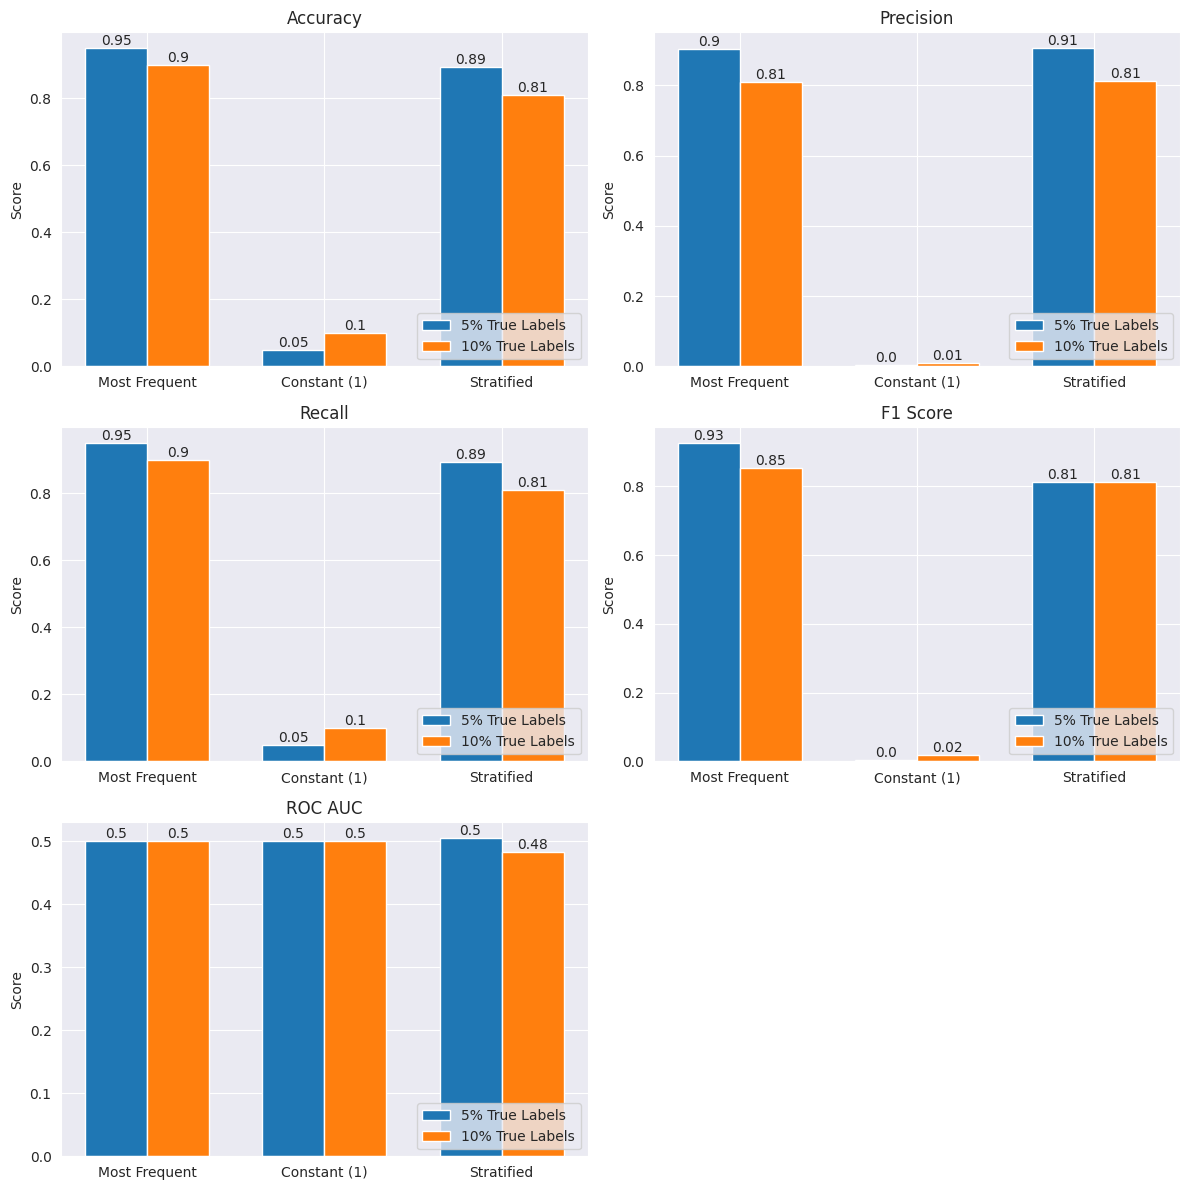

In [158]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
strategies = ['Most Frequent (0)', 'Constant (1)', 'Stratified']

# Values for each strategy and dataset size
values_5 = [
    [accuracy_mf_5, precision_mf_5, recall_mf_5, f1_mf_5, roc_auc_mf_5],
    [accuracy_constant_5, precision_constant_5, recall_constant_5, f1_constant_5, roc_auc_constant_5],
    [accuracy_stratified_5, precision_stratified_5, recall_stratified_5, f1_stratified, roc_auc_stratified_5]
]

values_10 = [
    [accuracy_mf_10, precision_mf_10, recall_mf_10, f1_mf_10, roc_auc_mf_10],
    [accuracy_constant_10, precision_constant_10, recall_constant_10, f1_constant_10, roc_auc_constant_10],
    [accuracy_stratified_10, precision_stratified_10, recall_stratified_10, f1_stratified, roc_auc_stratified_10]
]

x = np.arange(len(strategies))  # the label locations
width = 0.35  # the width of the bars

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    bars1 = ax.bar(x - width/2, [val[i] for val in values_5], width, label='5% True Labels')
    bars2 = ax.bar(x + width/2, [val[i] for val in values_10], width, label='10% True Labels')
    ax.set_title(metric)
    ax.set_xticks(x)
    ax.set_xticklabels(strategies)
    ax.set_ylabel('Score')
    ax.legend(loc="lower right")

    # Add numbers over the bars
    for bar in bars1:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2 , yval, round(yval, 2), ha='center', va='bottom')
    for bar in bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2 , yval, round(yval, 2), ha='center', va='bottom')

# Hide the unused subplot
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()

In [146]:
values_10

[[0.9, 0.81, 0.9, 0.8526315789473685, 0.5],
 [0.1, 0.01, 0.1, 0.01818181818181818, 0.5],
 [0.8107142857142857,
  0.8136694600906718,
  0.8107142857142857,
  0.8121865299431481,
  0.48214285714285715]]

In [147]:
values_5

[[0.95, 0.9025, 0.95, 0.9256410256410257, 0.5],
 [0.05, 0.0025, 0.05, 0.0047619047619047615, 0.5],
 [0.8946428571428572,
  0.9058095238095238,
  0.8946428571428572,
  0.8121865299431481,
  0.5046992481203008]]